# Airline Customer Value Analysis With Clustering Algorithms

## Business Problem Statement

## Import Libraries and Settings

In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


#### Load Dataset (Jupyter Notebook)

In [2]:
df=pd.read_csv('flight.csv')

#### Load Dataset (Google Colab)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('flight.csv')

# Initial Data Understanding and Transformation

In [4]:
df.sample(20)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  \
5441       58808    2/4/2011          3/8/2011    Male         4   
16254      25982    1/3/2011          1/3/2011  Female         4   
4714       37422   4/19/2010          7/8/2010  Female         5   
60208      34009   1/11/2013          8/1/2013    Male         4   
30446      20904  12/10/2007        12/10/2007    Male         4   
29919      38719   9/26/2007         9/26/2007  Female         4   
20137      23467    9/2/2011         9/12/2012  Female         4   
27866      52240   11/7/2012         11/7/2012  Female         5   
7624        8433   9/30/2006         9/30/2006    Male         4   
29011      28783   7/26/2012         9/24/2012  Female         4   
62746      27377  12/12/2011         1/27/2012  Female         4   
15920      60705    8/7/2012          8/7/2012    Male         4   
53630      10845  11/30/2012          8/8/2013    Male         4   
21918      52757  11/17/2009          7/5/2012    Male         4   
33600      23620   6/23/2012         6/23/2012    Male         4   
49050      45634    3/5/2006         4/27/2006    Male         4   
53974      22127   5/31/2009        11/22/2011  Female         4   
21020      21388    7/3/2008          7/3/2008  Female         4   
58727      58703   7/12/2010         7/12/2010    Male         4   
18239      39021   2/24/2008         7/18/2011  Female         4   

          WORK_CITY WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  \
5441      guangzhou     guangdong           CN  33.0  3/31/2014            48   
16254        dalian      liaoning           CN  30.0  3/31/2014            14   
4714   guangzhoushi     guangdong           CN  30.0  3/31/2014            37   
60208        dalian      liaoning           CN  36.0  3/31/2014             2   
30446       beijing       beijing           CN  46.0  3/31/2014             8   
29919       beijing       beijing           CN  59.0  3/31/2014             3   
20137       beijing       beijing           CN  68.0  3/31/2014             3   
27866        guilin       guangxi           CN  53.0  3/31/2014            16   
7624         dalian      liaoning           CN  35.0  3/31/2014            25   
29011    beijingshi       beijing           CN  30.0  3/31/2014             7   
62746     guangzhou     guangdong           CN  32.0  3/31/2014             2   
15920     manzhouli     neimenggu           CN  41.0  3/31/2014             9   
53630        zhuhai     guangdong           CN  45.0  3/31/2014             4   
21918      shenyang      liaoning           CN  38.0  3/31/2014            12   
33600        dalian      liaoning           CN  35.0  3/31/2014            10   
49050       nanning       guangxi           CN  65.0  3/31/2014             4   
53974             5       beijing           CN  32.0  3/31/2014             2   
21020        shamen        fujian           CN  41.0  3/31/2014             9   
58727   shanghaishi           NaN           CN  59.0  3/31/2014             3   
18239    beijingshi           NaN           CN  30.0  3/31/2014             8   

       BP_SUM  SUM_YR_1  SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  LAST_TO_END  \
5441    30241    9149.0   25628.0       44632        3/25/2014            7   
16254   11952   16018.0       0.0       17808        1/18/2013          439   
4714    31442   15261.0   18282.0       51430        3/30/2014            2   
60208    1126       0.0    1352.0        1327        8/10/2013          235   
30446    6948       0.0    6595.0       10140        2/11/2014           50   
29919    5286    6980.0       0.0        7595        9/14/2012          565   
20137   13906   11850.0    3229.0       10693        11/2/2013          151   
27866    6715    1436.0    7620.0       11844        3/19/2014           13   
7624    22027   14457.0    6670.0       31484         3/2/2014           30   
29011    6655    5629.0    1398.0       12161       11/12/2013          141   
62746  

There are some weird values in these columns, we will see the details later down below. The columns are also not in the same format, so we will change it to become most frequent format which is using all in uppercase.

In [5]:
# Initial data transformation :  converting column name to lowercase
df.columns = df.columns.str.upper()

### **Data Information**

In [6]:
df.shape

(62988, 23)

In [7]:
# Check data information
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:7]])

desc_df = pd.DataFrame(data=list_item, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, Unique Sample'.split(","))
desc_df

Feature  Data Type   Null Values   Null Percentage  \
0           MEMBER_NO      int64             0              0.00   
1            FFP_DATE     object             0              0.00   
2   FIRST_FLIGHT_DATE     object             0              0.00   
3              GENDER     object             3              0.00   
4            FFP_TIER      int64             0              0.00   
5           WORK_CITY     object          2269              3.60   
6       WORK_PROVINCE     object          3248              5.16   
7        WORK_COUNTRY     object            26              0.04   
8                 AGE    float64           420              0.67   
9           LOAD_TIME     object             0              0.00   
10       FLIGHT_COUNT      int64             0              0.00   
11             BP_SUM      int64             0              0.00   
12           SUM_YR_1    float64           551              0.87   
13           SUM_YR_2    float64           138              0.22   
14         SEG_KM_SUM      int64             0              0.00   
15   LAST_FLIGHT_DATE     object             0              0.00   
16        LAST_TO_END      int64             0              0.00   
17       AVG_INTERVAL    float64             0              0.00   
18       MAX_INTERVAL      int64             0              0.00   
19     EXCHANGE_COUNT      int64             0              0.00   
20       AVG_DISCOUNT    float64             0              0.00   
21         POINTS_SUM      int64             0              0.00   
22    POINT_NOTFLIGHT      int64             0              0.00   

     Duplicated Values   Unique Values  \
0                    0           62988   
1                    0            3068   
2                    0            3406   
3                    0               2   
4                    0               3   
5                    0            3234   
6                    0            1165   
7                    0             118   
8                    0              84   
9                    0               1   
10                   0             153   
11                   0           23449   
12                   0           15828   
13                   0           16767   
14                   0           29081   
15                   0             731   
16                   0             731   
17                   0           10706   
18                   0             706   
19                   0              28   
20                   0           54179   
21                   0           25062   
22                   0              99   

                                                                                 Unique Sample  
0                                            [54993, 28065, 55106, 21189, 39546, 56972, 44924]  
1                 [11/2/2006, 2/19/2007, 2/1/2007, 8/22/2008, 4/10/2009, 2/10/2008, 3/22/2006]  
2                [12/24/2008, 8/3/2007, 8/30/2007, 8/23/2008, 4/15/2009, 9/29/2009, 3/29/2006]  
3                                                                          [Male, Female, nan]  
4                                                                                    [6, 5, 4]  
5                           [., nan, Los Angeles, guiyang, guangzhou, wulumuqishi, wenzhoushi]  
6                                   [beijing, CA, guizhou, guangdong, xinjiang, zhejiang, nan]  
7                                                                 [CN, US, FR, AN, JP, HK, MY]  
8                                                   [31.0, 42.0, 40.0, 64.0, 48.0, 46.0, 50.0]  
9                                                                                  [3/31/2014]  
10                                                           [210, 140, 135, 23, 152, 92, 101]  
11                                    [505308, 362480, 351159, 337314, 273844, 313338, 248864]  
12                      [239560.0, 171483.0, 163618.0, 116350.0, 124560.0, 112364.0, 120500.0]  
13            

**Features Description**

- `MEMBER_NO` : Member ID
- `FFP_DATE` : Frequent Flyer Program Join Date
- `FIRST_FLIGHT_DATE` : First Flight Date
- `GENDER` : Gender
- `FFP_TIER` : Frequent Flyer Program Tier
- `WORK_CITY` : Work City
- `WORK_PROVINCE` : Work Proviince
- `WORK_COUNTRY` : Work Country
- `AGE` : Customer Age
- `LOAD_TIME` : Date data was taken
- `FLIGHT_COUNT` : Number of customer flights
- `BP_SUM` : Total basic integral
- `SUM_YR_1` : Fare Revenue
- `SUM_YR_2` : Votes Prices
- `SEG_KM_SUM` : Total distance (km) flights that have been done
- `LAST_FLIGHT_DATE` : Last Flight Date
- `LAST_TO_END` : last flight time to last flight order interval
- `AVG_INTERVAL` : Average time distance
- `MAX_INTERVAL` : Maximum time distance
- `EXCHANGE_COUNT` : Number of redemptions
- `AVG_DISCOUNT` : The average discount that customers get
- `POINTS_SUM` : The number of points earned by the customer
- `POINT_NOTFLIGHT` : Points not used by members

Some of the data type are wrong here like features that have date values which are FFP_DATE, FIRST_FLIGHT_DATE, LAST_FLIGHT_DATE, LOAD_TIME, but the data type is assigned as object. There are also features that should have int values but are assigned as float like AGE, SUM_YR_1, SUM_YR_2. We will need to convert them later if needed.

Now we will check some of the weird values in the dataset that we found before

In [8]:
# Check inconsistent values in WORK_CITY feature
for values in df["WORK_CITY"].unique()[:30]: #before showing only 30 we tried it for all data values
    print(values)

.
nan
Los Angeles
guiyang
guangzhou
wulumuqishi
wenzhoushi
DRANCY
wenzhou
PARIS
beijing
SAN MARINO
shenzhen
BOWLAND HEIGHTS
wulumuqi
dongguan
VECHEL
zhanjiang
guangzhoushi
Paris
UPLAND
fanyu
changsha
SUMIDA-KU
HK
PUCHONG
hangzhoushi
TORRANCE
chengdu
shishi


In [9]:
# Check inconsistent values in WORK_PROVINCE feature
for values in df["WORK_PROVINCE"].unique()[:30]: #before showing only 30 we tried it for all data values
    print(values)

beijing
CA
guizhou
guangdong
xinjiang
zhejiang
nan
PARIS
.
CALIFORNIA
NORD BRABANT
FRANCE
guangdongsheng
hunan
TOKYO-TO
HK
Selangor Darul Ehsan
sichuan
fujian
VIC
shanghai
Noord-Holland
FR
zhongqing
guangxi
CA91030
ZUID HOLLAND
xianggang
jilin
ANDE


- As we can see that both WORK_CITY and WORK_PROVINCE feature values are very dirty and non-consistent, some of the values even only have symbols like '?' and '--' where in city and province this does not make any sense at all. There is a high chance we will avoid using these features at all in our clustering analysis. 

- Since the amount of missing values more dominant in the WORK_PROVINCE and WORK_CITY features which is actually got other problem other than missing values but also unrelevant values, we will ignore these two columns in the drop missing values procedure, since we wont be using them.

In [11]:
# Check format values in date features
for values in df["FIRST_FLIGHT_DATE"].unique()[:30]: # check also for other date features
    print(values)

12/24/2008
8/3/2007
8/30/2007
8/23/2008
4/15/2009
9/29/2009
3/29/2006
4/9/2010
7/1/2011
7/5/2010
11/20/2010
12/2/2004
11/18/2007
10/27/2007
2/1/2010
4/5/2008
8/20/2010
2/23/2011
2/22/2007
10/22/2011
11/21/2008
6/9/2011
4/10/2005
4/13/2010
3/1/2010
11/1/2010
3/23/2007
3/17/2005
1/8/2006
6/27/2008


All of the date features have the original format of MM/DD/YY, we will change it later to YY-MM-DD with pd.to_datetime() method

In [12]:
# Check values in load_time feature
df["LOAD_TIME"].unique()

array(['3/31/2014'], dtype=object)

The feature LOAD_TIME which from the definition is the date where data was taken only have 1 value that is 3/31/2014; and this actually does not have any meaning to our clustering analysis here so later we will drop or does not use this feature at all, but this depends since we need to check whether we can utilize this column for feature engineering or not.

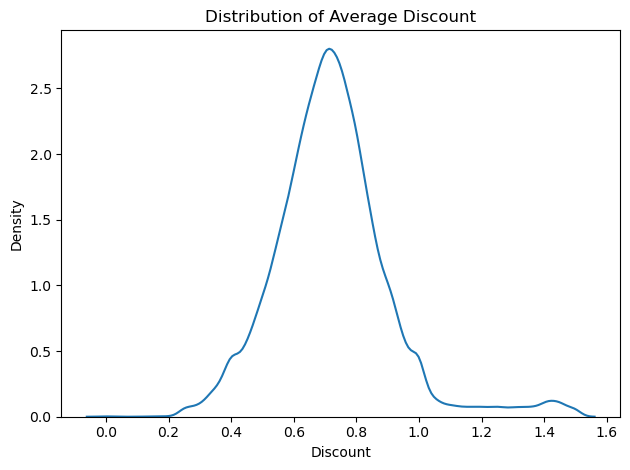

In [14]:
# Check values in AVG_DISCOUNT feature
sns.kdeplot(x = 'AVG_DISCOUNT', data=df)
plt.title("Distribution of Average Discount")
plt.ylabel("Density")
plt.xlabel("Discount")
plt.tight_layout()

- The distribution of AVG_DISCOUNT is kinda weird here. From the definition it says that AVG_DISCOUNT is the average discount that customers get, while from the values range this should be in percentage, then AVG_DISCOUNT that > 1 (100%) is not valid making this information is hard to interpret because the scaling problem from the beginning, will probably not use this feature either.

- We could however filter this using only data with <= 1 discount (with the code down below), but this move is not recommended since we doesn't know the details about what the problem here, whether it's the only scaling problem and it actually interpreted in another way or the system that gather the data.

In [15]:
# # Filter the avg_discount more than 1
# df = df[df['avg_discount']<=1]

In [17]:
# Count the total of missing values that will be drop relative to entire data
df[['WORK_PROVINCE', 'WORK_COUNTRY', 'WORK_CITY', 'AGE', 'SUM_YR_1', 'SUM_YR_2', 'GENDER']].isnull().sum().sum()/df.shape[0]*100

10.565504540547407

In [18]:
# Drop missing values from specific columns
df = df.dropna(subset=['WORK_PROVINCE', 'WORK_COUNTRY', 'WORK_CITY', 'AGE', 'SUM_YR_1', 'SUM_YR_2', 'GENDER'])

In [19]:
# Checking the shape of our new dataframe after drop missing values
df.shape

(58255, 23)

We will also reduce the dimension to 22 by dropping the member_no feature because it has no meaning in this clustering case

In [20]:
df.drop(columns='MEMBER_NO', inplace=True)

Before we change the data type of date features, there is a problem that i just found when i ran the code below. That is in last_flight_date there is a date values of 2014/2/29  0:00:00 which raise an ValueError saying it doesn't match format "%m/%d/%Y", we will handle that first

In [22]:
# Checking data for that condition
df[df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
248     6/17/2007         6/17/2007  Female         6  guangzhou   
447     8/26/2009         4/29/2010    Male         5    haerbin   
473    11/10/2006         1/26/2007    Male         5          .   
832     7/13/2005          8/6/2005    Male         5  guangzhou   
1051    5/24/2006         4/21/2007    Male         5      wuhan   
...           ...               ...     ...       ...        ...   
61388    4/8/2009         4/11/2009    Male         4   wulumuqi   
61539   1/11/2013         7/10/2013    Male         4  dalianshi   
61871   7/26/2009         7/26/2009    Male         4    tianjin   
61909   4/11/2011         4/20/2011    Male         4  guangzhou   
62721  10/31/2007         3/13/2008    Male         4     foshan   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  BP_SUM  \
248       guangdong           CN  46.0  3/31/2014            53  116307   
447    heilongjiang           CN  70.0  3/31/2014            31   96739   
473         beijing           CN  39.0  3/31/2014            49   84754   
832       guangdong           CN  40.0  3/31/2014            80   61418   
1051          hubei           CN  50.0  3/31/2014            27   65918   
...             ...          ...   ...        ...           ...     ...   
61388      xinjiang           CN  45.0  3/31/2014             2     680   
61539      liaoning           CN  23.0  3/31/2014             3       0   
61871       tianjin           CN  37.0  3/31/2014             2     854   
61909     guangdong           CN  34.0  3/31/2014             2     838   
62721     guangdong           CN  42.0  3/31/2014             2     276   

       SUM_YR_1  SUM_YR_2  SEG_KM_SUM    LAST_FLIGHT_DATE  LAST_TO_END  \
248     30884.0   70845.0       85000  2014/2/29  0:00:00           32   
447     26510.0   46323.0       69453  2014/2/29  0:00:00           32   
473     28693.0   30580.0       65717  2014/2/29  0:00:00           32   
832     32900.0   36417.0      114222  2014/2/29  0:00:00           32   
1051    23892.0   35680.0       49859  2014/2/29  0:00:00           32   
...         ...       ...         ...                 ...          ...   
61388       0.0     783.0        3243  2014/2/29  0:00:00           32   
61539       0.0     955.0        3513  2014/2/29  0:00:00           32   
61871       0.0     966.0        1298  2014/2/29  0:00:00           32   
61909       0.0     853.0        2595  2014/2/29  0:00:00           32   
62721       0.0     688.0        1199  2014/2/29  0:00:00           32   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  AVG_DISCOUNT  POINTS_SUM  \
248       13.250000            57               0      1.373478      132653   
447       22.766667            75               6      1.375395      101413   
473       14.250000            65               1      1.425974       93153   
832        8.696203            34               2      0.664970       91476   
1051      19.115385            72               4      1.388584       69047   
...             ...           ...             ...           ...         ...   
61388    459.000000           459               1      0.308511        2180   
61539    117.000000           211               0      0.276667           0   
61871    135.000000           135               0      0.690000        1094   
61909      1.000000             1               0      0.340000        3356   
62721     78.000000            78               0      0.489525         276   

       POINT_NOTFLIGHT  
248                  4  
447                  7  
473                  8  
832                 15  
1051                 4  
...                ...  
61388                2  
61539                0  
61871                1  
61909               19  
62721                0  

[395 rows x 22 columns]

In [23]:
# Handling data for that condition by changing it to the day before (Feb 28th)
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2/28/2014')

In [25]:
# Convert object to datetime
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])

#Convert float to int
df[['AGE', 'SUM_YR_1', 'SUM_YR_2']] = df[['AGE', 'SUM_YR_1', 'SUM_YR_2']].astype(int)

In [26]:
# Check dataframe after initial cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58255 entries, 0 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           58255 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  58255 non-null  datetime64[ns]
 2   GENDER             58255 non-null  object        
 3   FFP_TIER           58255 non-null  int64         
 4   WORK_CITY          58255 non-null  object        
 5   WORK_PROVINCE      58255 non-null  object        
 6   WORK_COUNTRY       58255 non-null  object        
 7   AGE                58255 non-null  int32         
 8   LOAD_TIME          58255 non-null  datetime64[ns]
 9   FLIGHT_COUNT       58255 non-null  int64         
 10  BP_SUM             58255 non-null  int64         
 11  SUM_YR_1           58255 non-null  int32         
 12  SUM_YR_2           58255 non-null  int32         
 13  SEG_KM_SUM         58255 non-null  int64         
 14  LAST_FLIGHT

Now all features have the right data type, so that in the future when we want to do further analysis we can broad the scope using more features

# Descriptive Statistics

In [27]:
# See values of features that have date values
df.select_dtypes(include='datetime64[ns]')

FFP_DATE FIRST_FLIGHT_DATE  LOAD_TIME LAST_FLIGHT_DATE
0     2006-11-02        2008-12-24 2014-03-31       2014-03-31
2     2007-02-01        2007-08-30 2014-03-31       2014-03-21
3     2008-08-22        2008-08-23 2014-03-31       2013-12-26
4     2009-04-10        2009-04-15 2014-03-31       2014-03-27
5     2008-02-10        2009-09-29 2014-03-31       2014-01-13
...          ...               ...        ...              ...
62982 2013-01-20        2013-01-20 2014-03-31       2013-01-20
62983 2011-05-20        2013-06-05 2014-03-31       2013-06-09
62984 2010-03-08        2013-09-14 2014-03-31       2014-01-03
62985 2006-03-30        2006-12-02 2014-03-31       2014-03-03
62986 2013-02-06        2013-02-14 2014-03-31       2013-02-26

[58255 rows x 4 columns]

In [34]:
# Grouping columns based on their types
nums = ['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
       'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'AVG_DISCOUNT', 'POINTS_SUM', 'POINT_NOTFLIGHT']

cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
dates = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [37]:
# Describe numerical columns
nums_summary = df[nums].describe().transpose()
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
nums_summary['coefficient of variation'] = nums_summary['std'] / nums_summary['mean']

nums_summary.rename(columns={'50%' : 'median'}, inplace=True)
nums_summary

count          mean           std    min          25%  \
FFP_TIER         58255.0      4.104849      0.378182    4.0     4.000000   
AGE              58255.0     42.228736      9.761965    6.0    35.000000   
FLIGHT_COUNT     58255.0     12.067634     14.236472    2.0     3.000000   
BP_SUM           58255.0  11066.303682  16283.209178    0.0  2608.000000   
SUM_YR_1         58255.0   5366.827963   8103.595049    0.0  1016.000000   
SUM_YR_2         58255.0   5694.530650   8710.724917    0.0   846.000000   
SEG_KM_SUM       58255.0  17353.000910  20969.886756  368.0  4904.000000   
LAST_TO_END      58255.0    171.255309    180.560120    1.0    28.000000   
AVG_INTERVAL     58255.0     67.937285     77.449058    0.0    23.700000   
MAX_INTERVAL     58255.0    167.349206    122.890446    0.0    81.000000   
EXCHANGE_COUNT   58255.0      0.328384      1.148485    0.0     0.000000   
AVG_DISCOUNT     58255.0      0.720627      0.183895    0.0     0.612155   
POINTS_SUM       58255.0  12742.648820  20606.104272    0.0  2872.500000   
POINT_NOTFLIGHT  58255.0      2.820548      7.500252    0.0     0.000000   

                       median           75%       max     range  \
FFP_TIER             4.000000      4.000000       6.0       2.0   
AGE                 41.000000     48.000000     110.0     104.0   
FLIGHT_COUNT         7.000000     15.000000     213.0     211.0   
BP_SUM            5832.000000  13022.000000  505308.0  505308.0   
SUM_YR_1          2808.000000   6591.500000  239560.0  239560.0   
SUM_YR_2          2846.000000   6958.000000  234188.0  234188.0   
SEG_KM_SUM       10237.000000  21571.500000  580717.0  580349.0   
LAST_TO_END        104.000000    258.000000     731.0     730.0   
AVG_INTERVAL        44.833333     82.000000     728.0     728.0   
MAX_INTERVAL       144.000000    228.000000     728.0     728.0   
EXCHANGE_COUNT       0.000000      0.000000      46.0      46.0   
AVG_DISCOUNT         0.711468      0.808159       1.5       1.5   
POINTS_SUM        6487.000000  14527.000000  985572.0  985572.0   
POINT_NOTFLIGHT      0.000000      1.000000     140.0     140.0   

                 coefficient of variation  
FFP_TIER                         0.092131  
AGE                              0.231169  
FLIGHT_COUNT                     1.179724  
BP_SUM                           1.471423  
SUM_YR_1                         1.509941  
SUM_YR_2                         1.529665  
SEG_KM_SUM                       1.208430  
LAST_TO_END                      1.054333  
AVG_INTERVAL                     1.140008  
MAX_INTERVAL                     0.734335  
EXCHANGE_COUNT                   3.497385  
AVG_DISCOUNT                     0.255188  
POINTS_SUM                       1.617097  
POINT_NOTFLIGHT                  2.659148

In [38]:
# Categorical columns
cats_summary = df[cats].describe().transpose()

cats_summary['bottom'] = [df[col].value_counts().idxmin() for col in cats]
cats_summary['freq_bottom'] = [df[col].value_counts().min() for col in cats]

cats_summary

count unique        top   freq     bottom  freq_bottom
GENDER         58255      2       Male  44434     Female        13821
WORK_CITY      58255   2944  guangzhou   9283       TAMA            1
WORK_PROVINCE  58255   1127  guangdong  17329  BETHUNGRA            1
WORK_COUNTRY   58255    105         CN  54954         EG            1

In [39]:
# Describe date columns (the important ones in this case are probably min and max value)
dates_summary = df[dates].describe().transpose()
dates_summary['date_data_range'] = dates_summary['max'] - dates_summary['min']

dates_summary

count                          mean        min        25%  \
FFP_DATE           58255 2010-03-30 17:00:47.522101248 2004-11-01 2008-05-05   
FIRST_FLIGHT_DATE  58255 2010-09-23 19:34:01.472834816 1905-12-31 2009-01-22   
LOAD_TIME          58255 2014-03-31 00:00:00.000000000 2014-03-31 2014-03-31   
LAST_FLIGHT_DATE   58255 2013-10-12 11:17:59.412925952 2012-04-01 2013-07-18   

                         50%        75%        max date_data_range  
FFP_DATE          2010-11-17 2012-04-09 2013-03-31       3072 days  
FIRST_FLIGHT_DATE 2011-05-24 2012-08-04 2015-04-03      39905 days  
LOAD_TIME         2014-03-31 2014-03-31 2014-03-31          0 days  
LAST_FLIGHT_DATE  2013-12-19 2014-03-04 2014-03-31        729 days

In [40]:
#Categorical feature value counts
for col in cats :
    print(df[col].value_counts())
    print()

GENDER
Male      44434
Female    13821
Name: count, dtype: int64

WORK_CITY
guangzhou          9283
beijing            7547
shanghai           4611
shenzhen           3551
dalian             1915
                   ... 
gujranwala            1
xiaomu                1
Endeavour Hills       1
jiangdushi            1
lingshui              1
Name: count, Length: 2944, dtype: int64

WORK_PROVINCE
guangdong           17329
beijing              7708
shanghai             4645
liaoning             4048
xinjiang             2431
                    ...  
YAMANASHI-PREF          1
KYORO-PREFECTURE        1
TIANJIN                 1
Jiangsu                 1
JAWATIMUR               1
Name: count, Length: 1127, dtype: int64

WORK_COUNTRY
CN    54954
KR      715
JP      713
US      476
HK      371
      ...  
AB        1
CD        1
NO        1
CM        1
CC        1
Name: count, Length: 105, dtype: int64



# Univariate Analysis

## Numerical Columns

In [41]:
len(df[nums].columns)

14

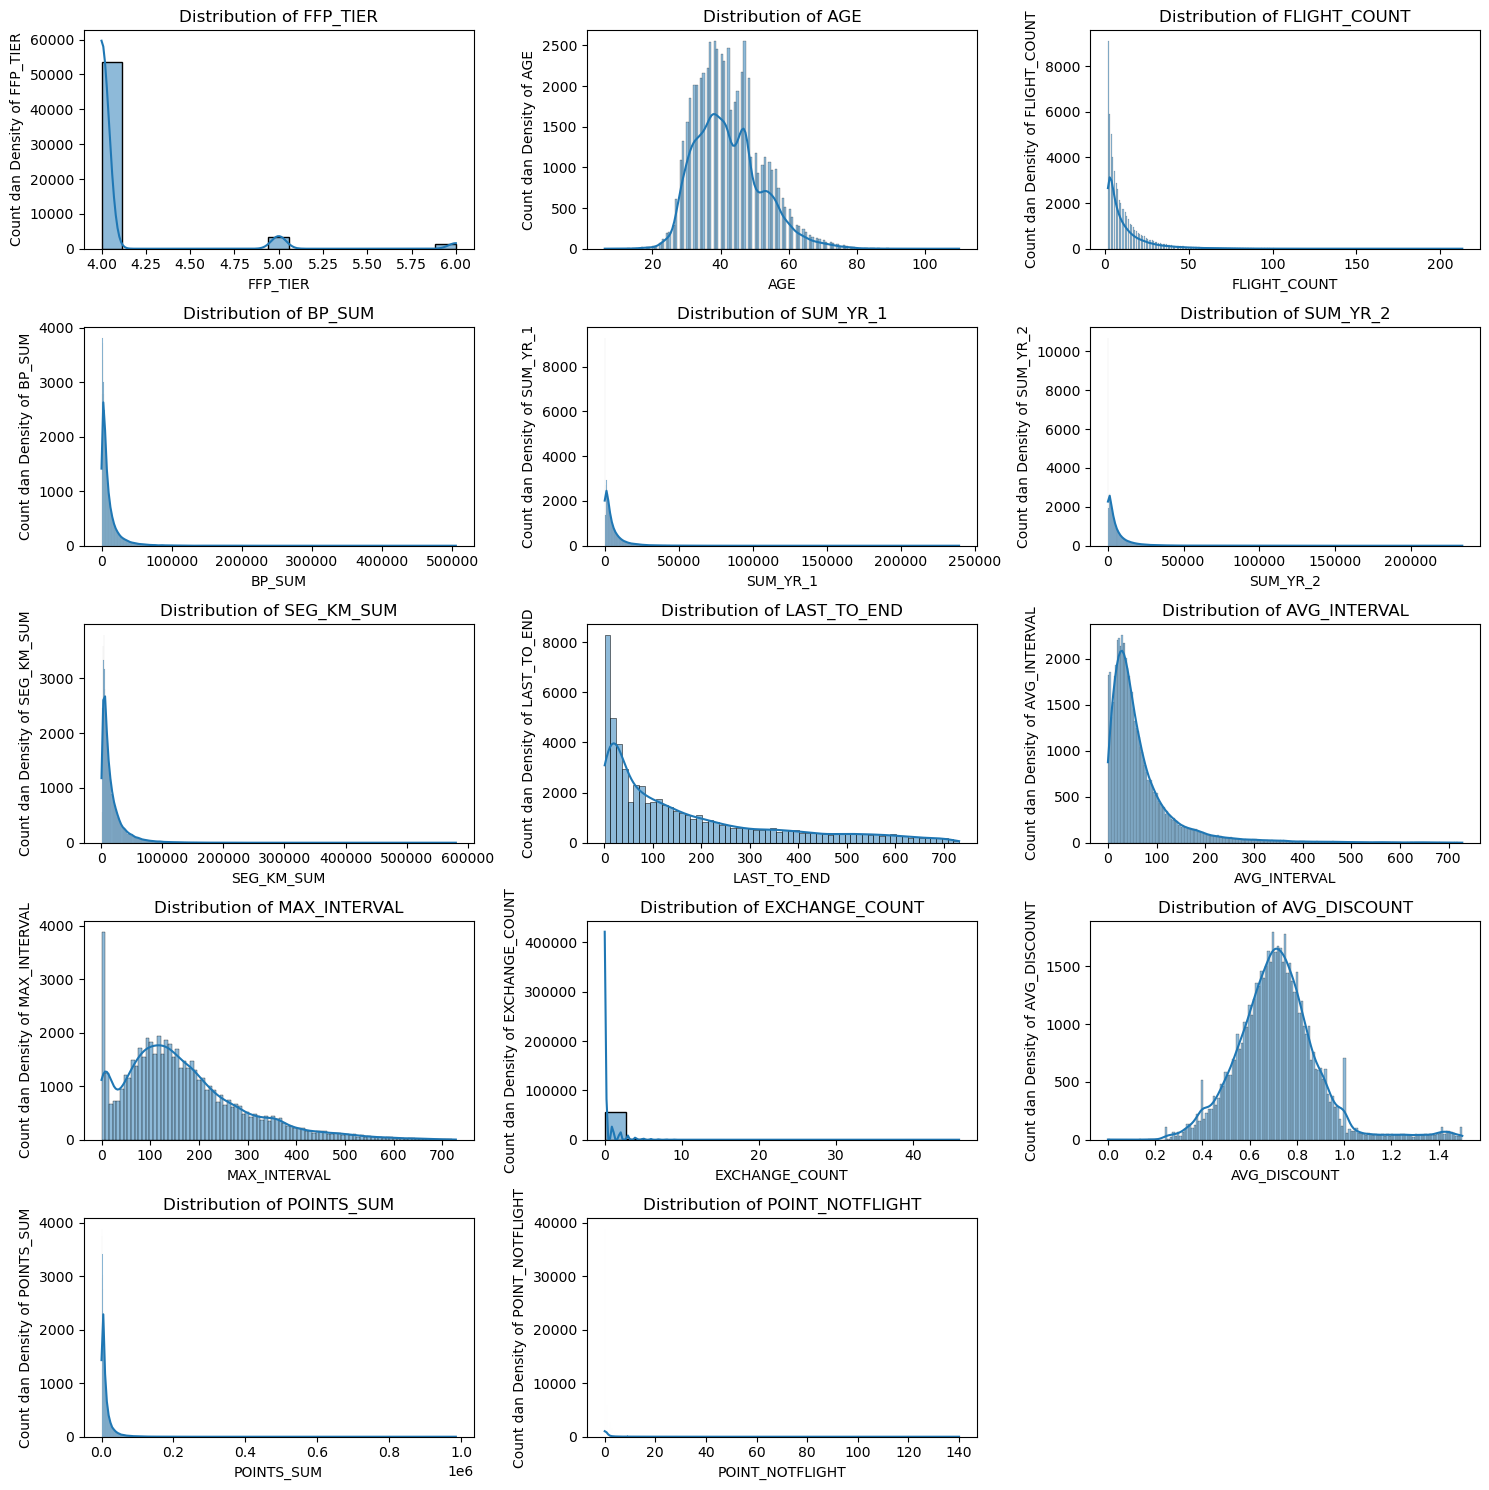

In [42]:
# Hisplot with kde
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.histplot(data = df, ax=axes[i], x=nums[i], kde=True)
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Count dan Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes):
    axes[len(nums)].remove()

plt.tight_layout()

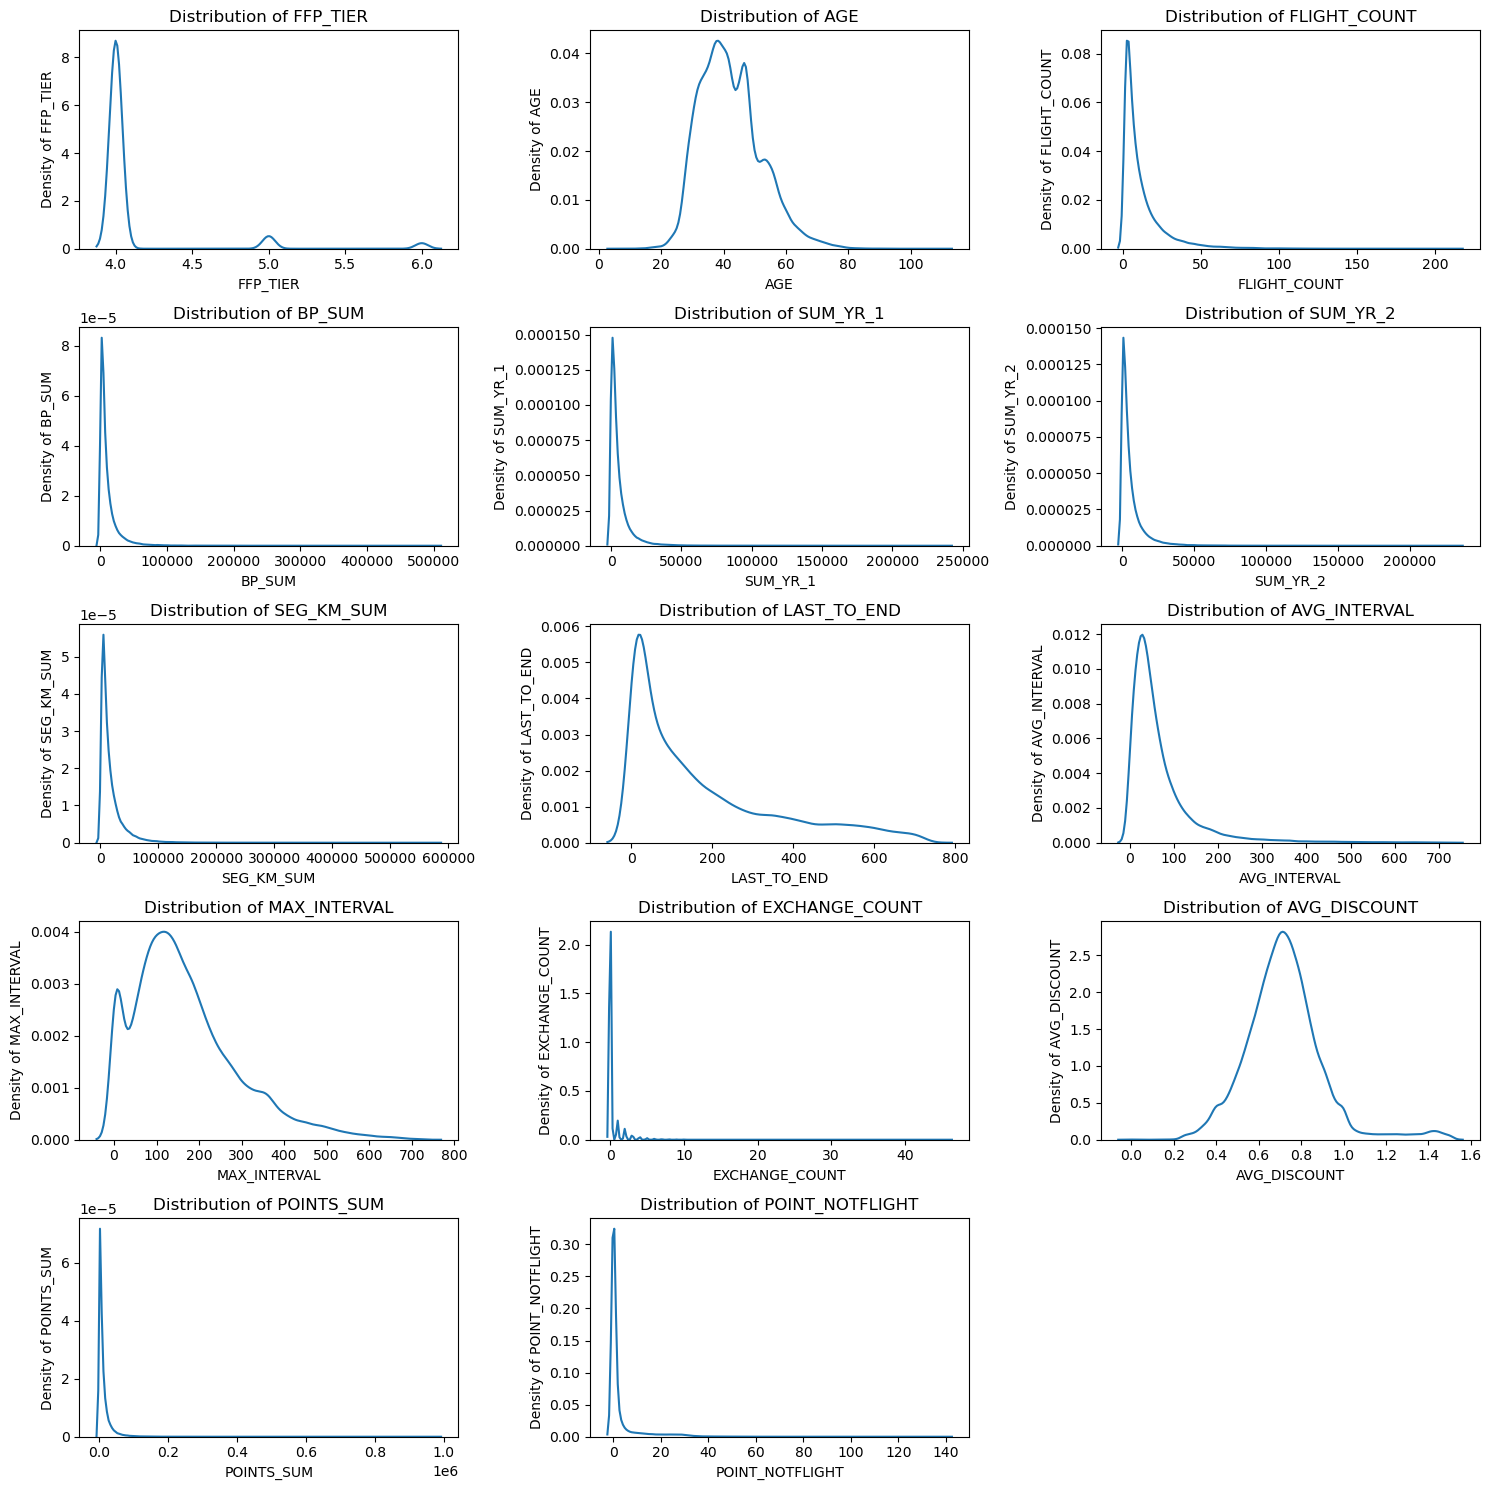

In [43]:
# Focusing only on kde
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.kdeplot(data = df, ax=axes[i], x=nums[i])
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes):
    axes[len(nums)].remove()

plt.tight_layout()

In [44]:
# Distribution categorization
from scipy.stats import skew, kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums :
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# # Distribution conditions for uniform and bimodal
# dist.loc[dist['Column Name'].isin(['Daily Internet Usage']), 'Type of Distribution'] = 'Uniform Distribution'
# dist.loc[dist['Column Name'].isin(['Column Name']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

Column Name  Skewness  Kurtosis          Type of Distribution
0          FFP_TIER     3.812    14.256      Highly Positively Skewed
1               AGE     0.633     0.428  Moderately Positively Skewed
2      FLIGHT_COUNT     3.187    15.920      Highly Positively Skewed
3            BP_SUM     5.445    59.567      Highly Positively Skewed
4          SUM_YR_1     5.058    53.778      Highly Positively Skewed
5          SUM_YR_2     4.401    37.468      Highly Positively Skewed
6        SEG_KM_SUM     3.783    30.026      Highly Positively Skewed
7       LAST_TO_END     1.220     0.533      Highly Positively Skewed
8      AVG_INTERVAL     3.221    14.592      Highly Positively Skewed
9      MAX_INTERVAL     1.084     1.317      Highly Positively Skewed
10   EXCHANGE_COUNT     8.049   136.579      Highly Positively Skewed
11     AVG_DISCOUNT     0.963     2.915  Moderately Positively Skewed
12       POINTS_SUM     8.400   192.015      Highly Positively Skewed
13  POINT_NOTFLIGHT     4.217    26.000      Highly Positively Skewed

All numeric columns have a right-skewed distribution/positively-skewed distribution except for the `AVG_DISCOUNT` column. However, in the `AVG_DISCOUNT` column, there are many average discounts greater than 1 (100%), and this is considered invalid. Therefore, it will not be used and will be dropped later.

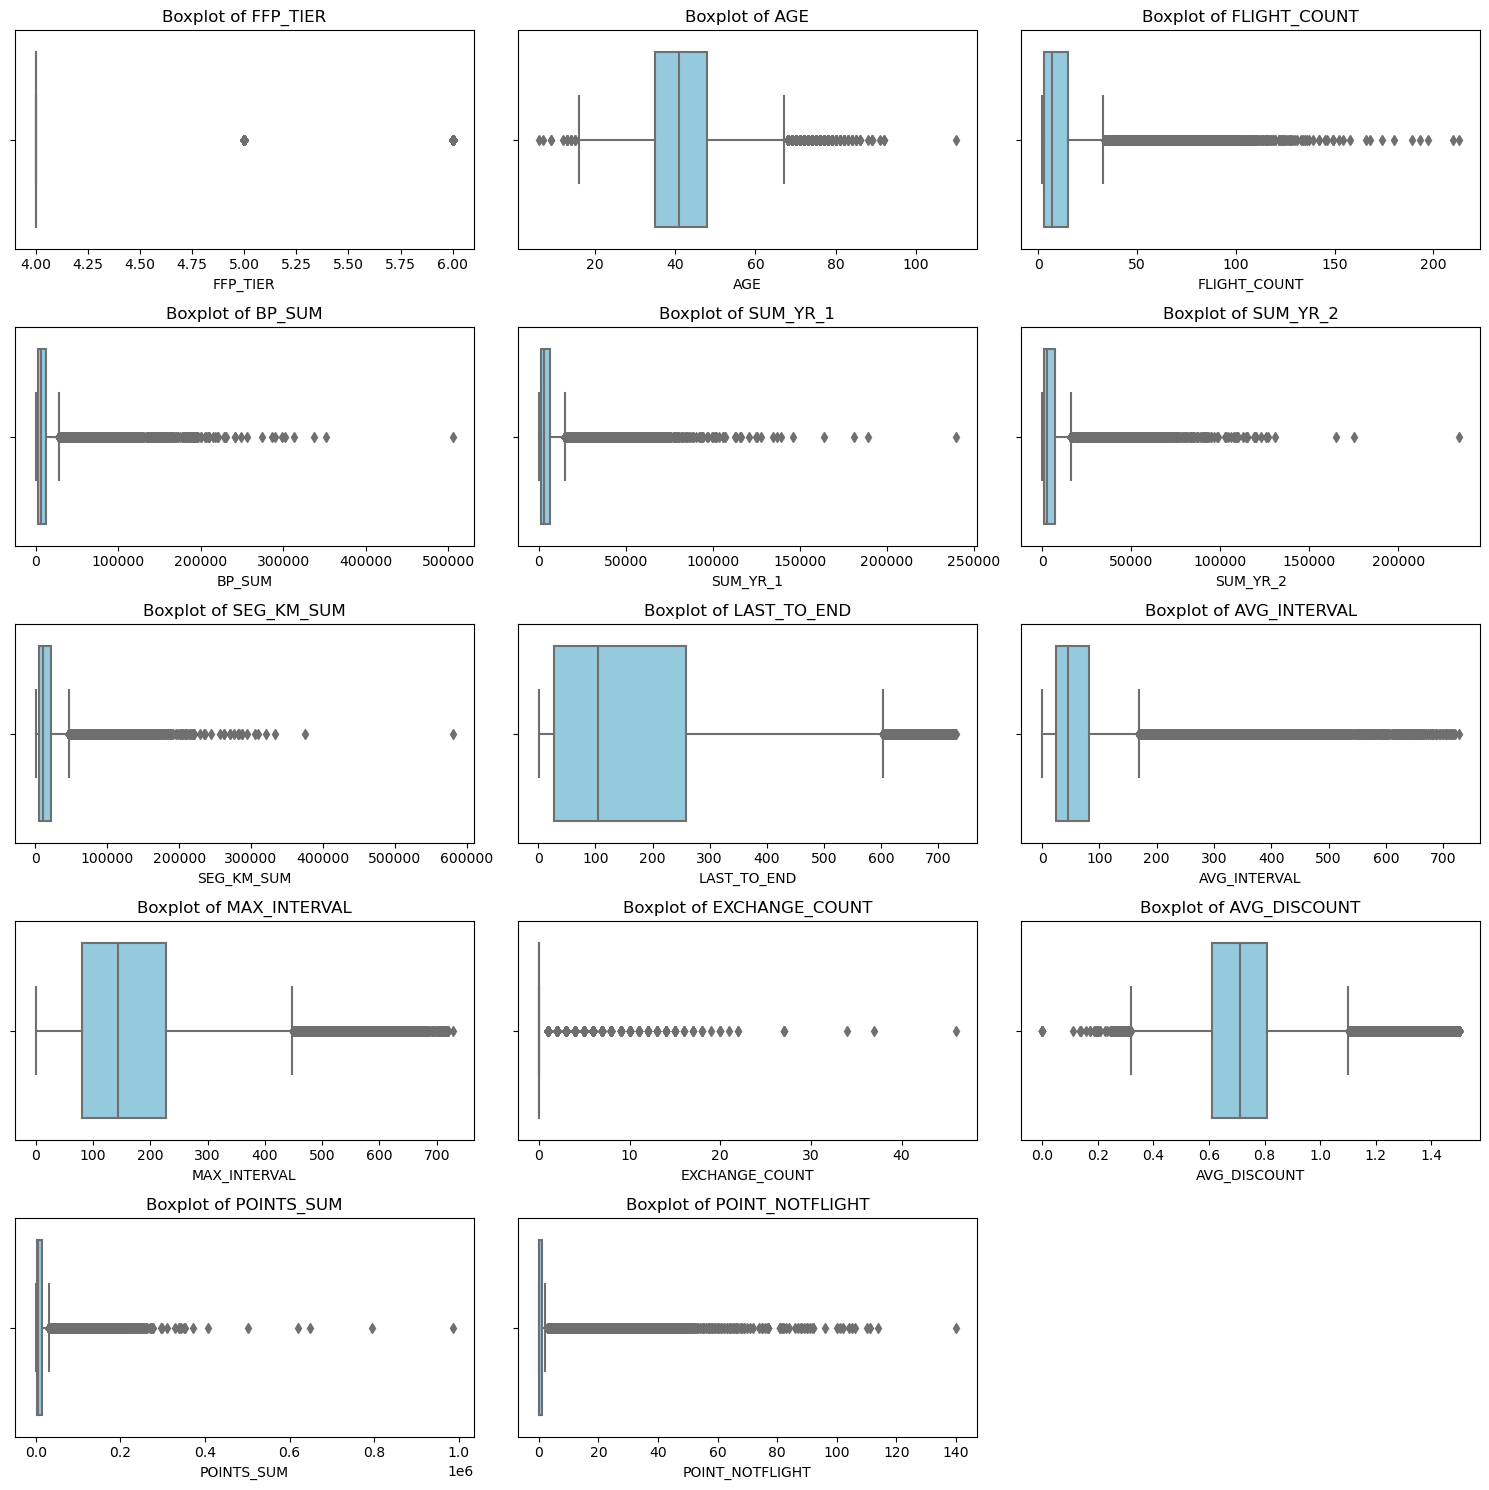

In [46]:
# Boxplot
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(data=df, ax=axes[i], x=nums[i], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes):
    axes[len(nums)].remove()

plt.tight_layout()

In [47]:
# Outlier detection for original data
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':nums,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

check_outliers

Amount of Rows: 58255
Amount of Outlier Rows : 25778
Amount of Non-Outlier Rows : 32477
Percentage of Outliers : 44.25



Column Name  Outlier Exist  Lower Limit   Upper Limit  Outlier Data  \
0          FFP_TIER           True      4.00000      4.000000          4676   
1               AGE           True     15.50000     67.500000           847   
2      FLIGHT_COUNT           True    -15.00000     33.000000          4120   
3            BP_SUM           True -13013.00000  28643.000000          4923   
4          SUM_YR_1           True  -7347.25000  14954.750000          4606   
5          SUM_YR_2           True  -8322.00000  16126.000000          4774   
6        SEG_KM_SUM           True -20097.25000  46572.750000          4424   
7       LAST_TO_END           True   -317.00000    603.000000          2064   
8      AVG_INTERVAL           True    -63.75000    169.450000          4494   
9      MAX_INTERVAL           True   -139.50000    448.500000          2007   
10   EXCHANGE_COUNT           True      0.00000      0.000000          8276   
11     AVG_DISCOUNT           True      0.31815      1.102164          2363   
12       POINTS_SUM           True -14609.25000  32008.750000          5112   
13  POINT_NOTFLIGHT           True     -1.50000      2.500000         10749   

    Non-Outlier Data  Percentage of Outlier  
0              53579               8.026779  
1              57408               1.453952  
2              54135               7.072354  
3              53332               8.450777  
4              53649               7.906617  
5              53481               8.195005  
6              53831               7.594198  
7              56191               3.543044  
8              53761               7.714359  
9              56248               3.445198  
10             49979              14.206506  
11             55892               4.056304  
12             53143               8.775212  
13             47506              18.451635

There are numerous outliers that will be dropped using the IQR method due to the non-normal distribution of features in the previous findings

## Categorical Columns

In [48]:
df.columns

Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER', 'WORK_CITY',
       'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME', 'FLIGHT_COUNT',
       'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_FLIGHT_DATE',
       'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
       'AVG_DISCOUNT', 'POINTS_SUM', 'POINT_NOTFLIGHT'],
      dtype='object')

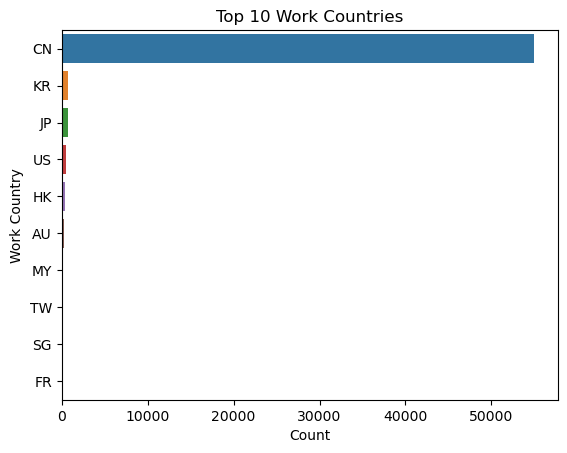

In [51]:
# Top 10 countries
df_country_top_10 = df['WORK_COUNTRY'].value_counts().head(10)

sns.countplot(data=df, y='WORK_COUNTRY', order=df_country_top_10.index)

plt.xlabel('Count')
plt.ylabel('Work Country')
plt.title('Top 10 Work Countries')
plt.show()

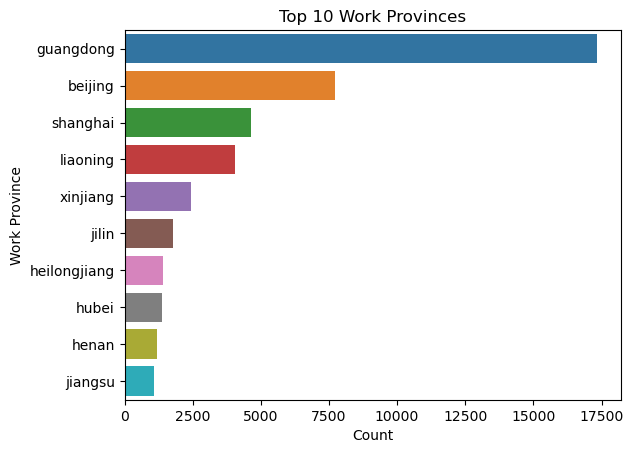

In [52]:
# Top 10 provinces
df_province_top_10 = df['WORK_PROVINCE'].value_counts().head(10)

sns.countplot(data=df, y='WORK_PROVINCE', order=df_province_top_10.index)

plt.xlabel('Count')
plt.ylabel('Work Province')
plt.title('Top 10 Work Provinces')
plt.show()

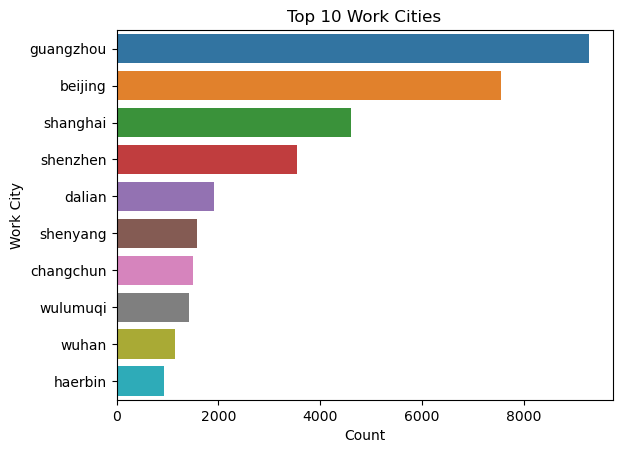

In [53]:
# Top 10 city
df_city_top_10 = df['WORK_CITY'].value_counts().head(10)

sns.countplot(y='WORK_CITY', data=df, order=df_city_top_10.index)

plt.xlabel('Count')
plt.ylabel('Work City')
plt.title('Top 10 Work Cities')
plt.show()

# Bivariate/Multivariate Analysis

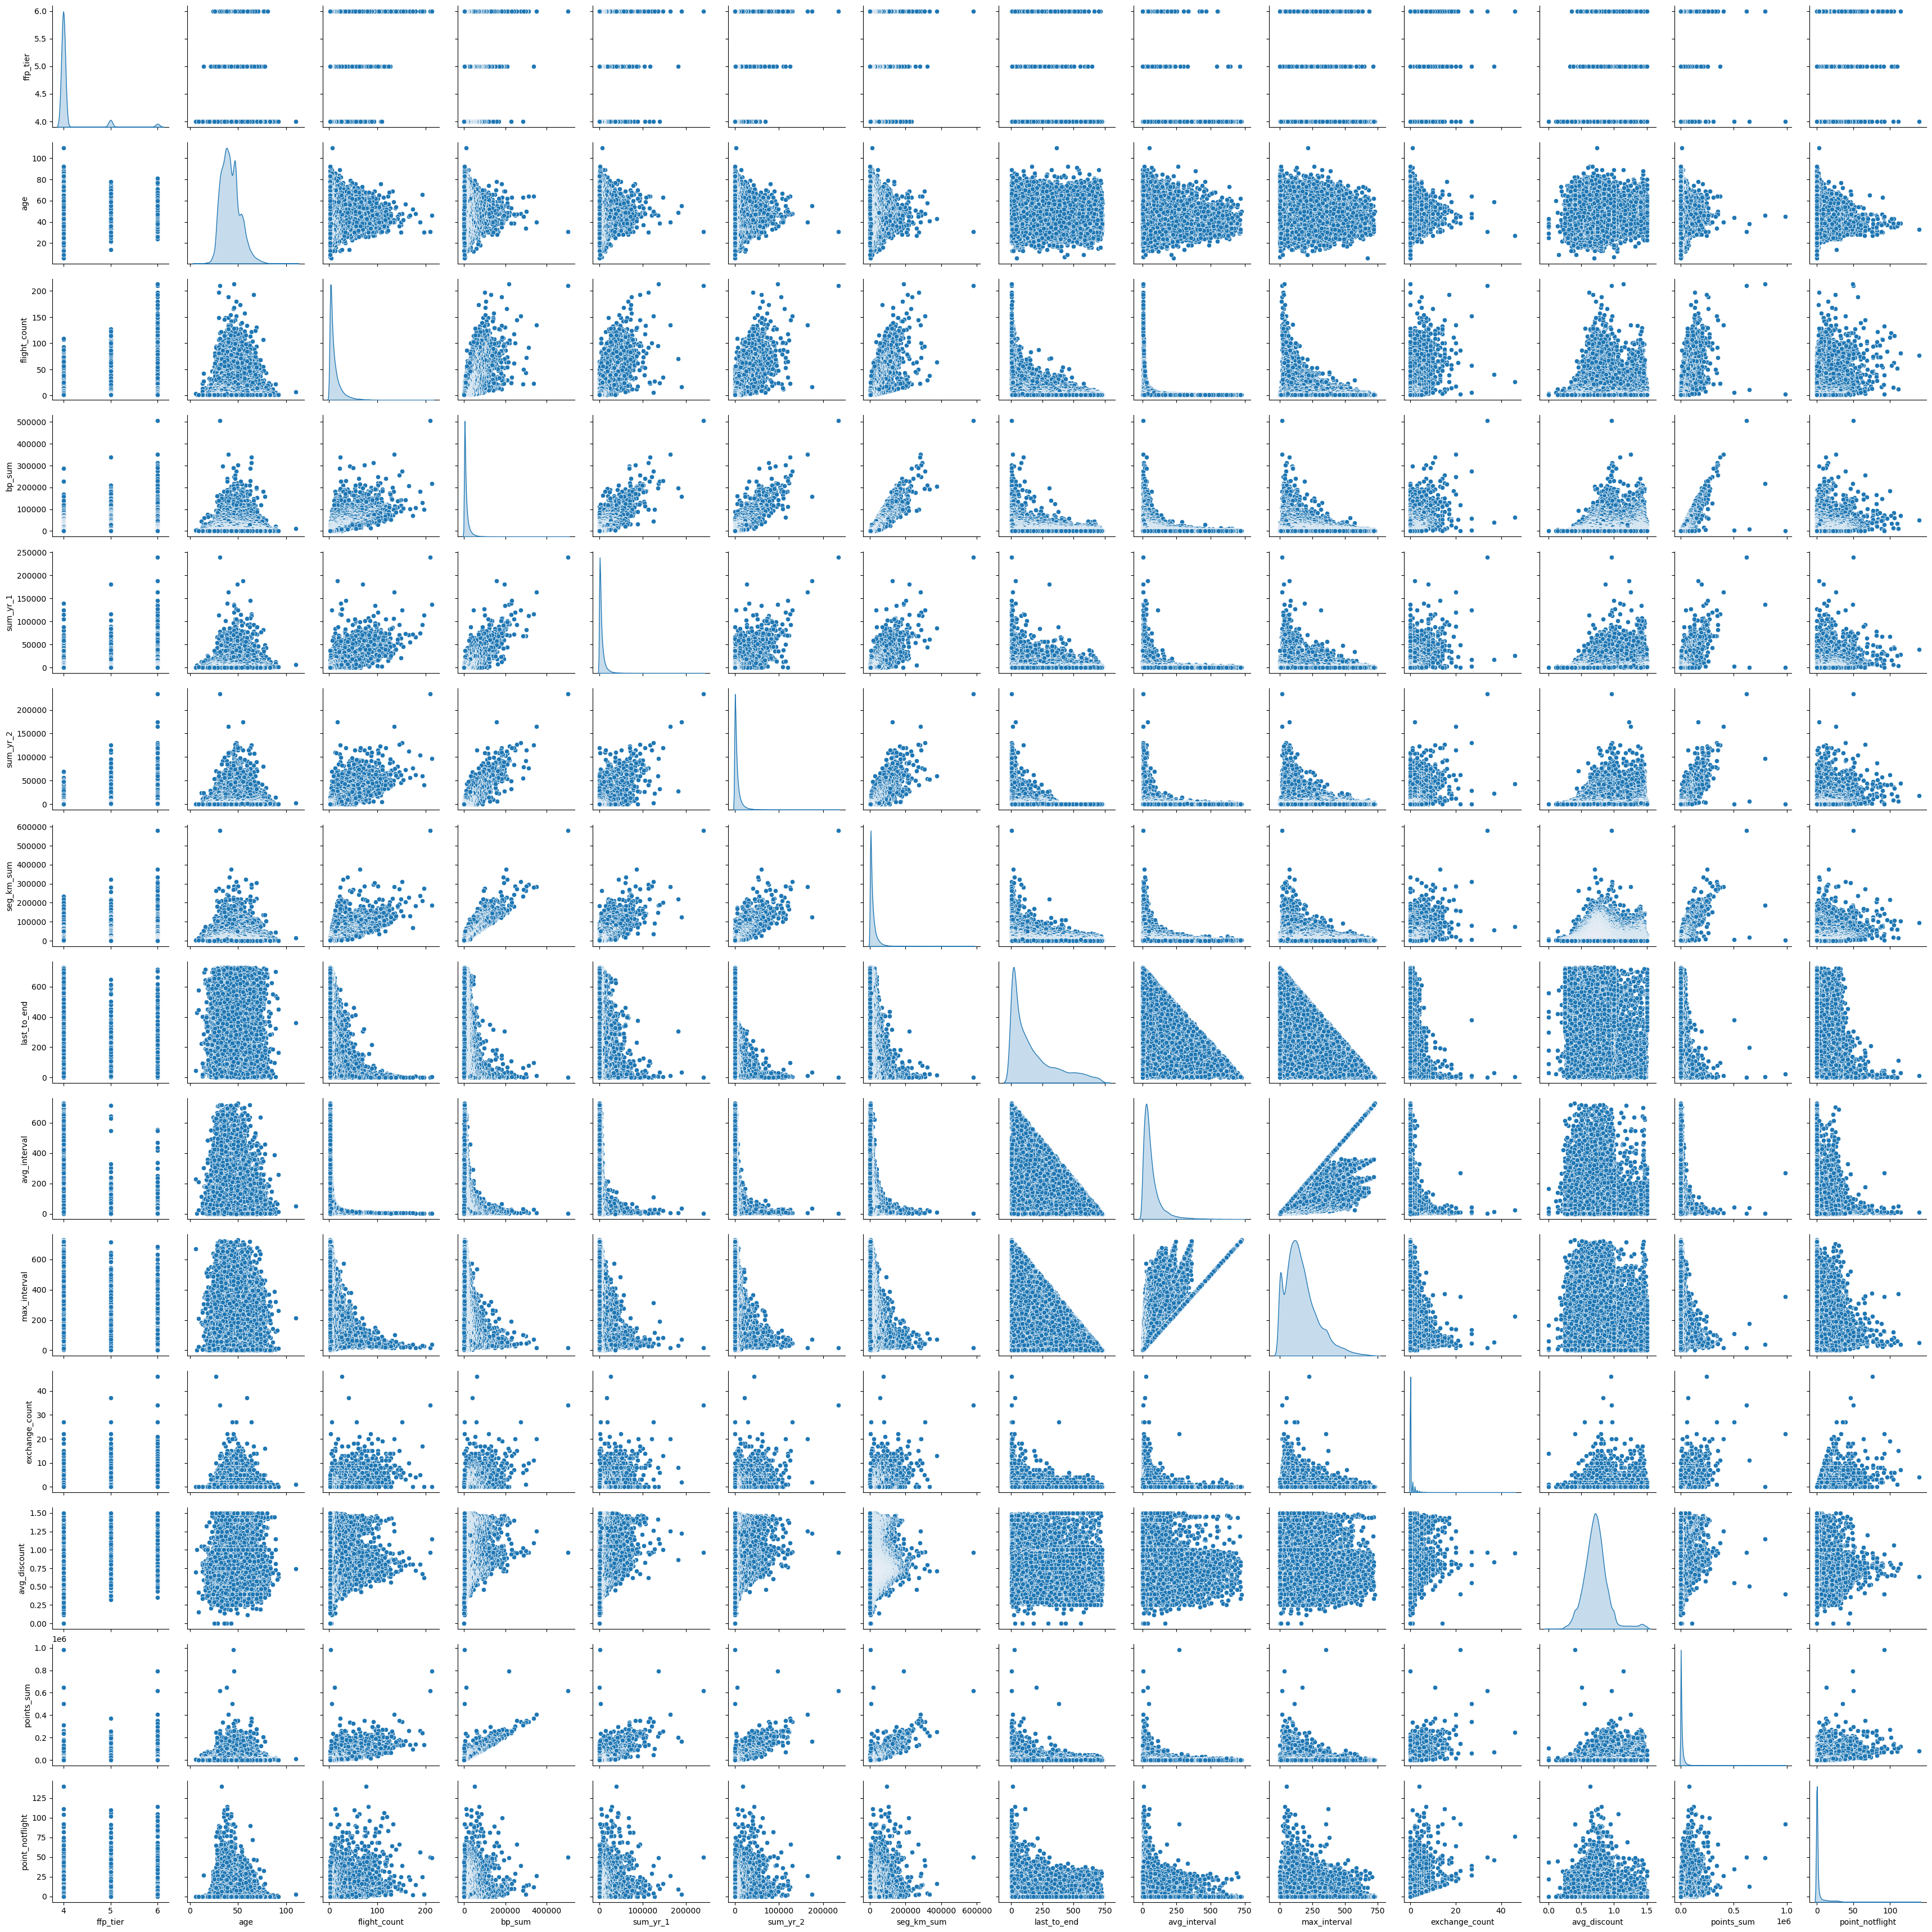

In [ ]:
# Pairplot before clustering
sns.pairplot(data=df, diag_kind='kde')
plt.show()

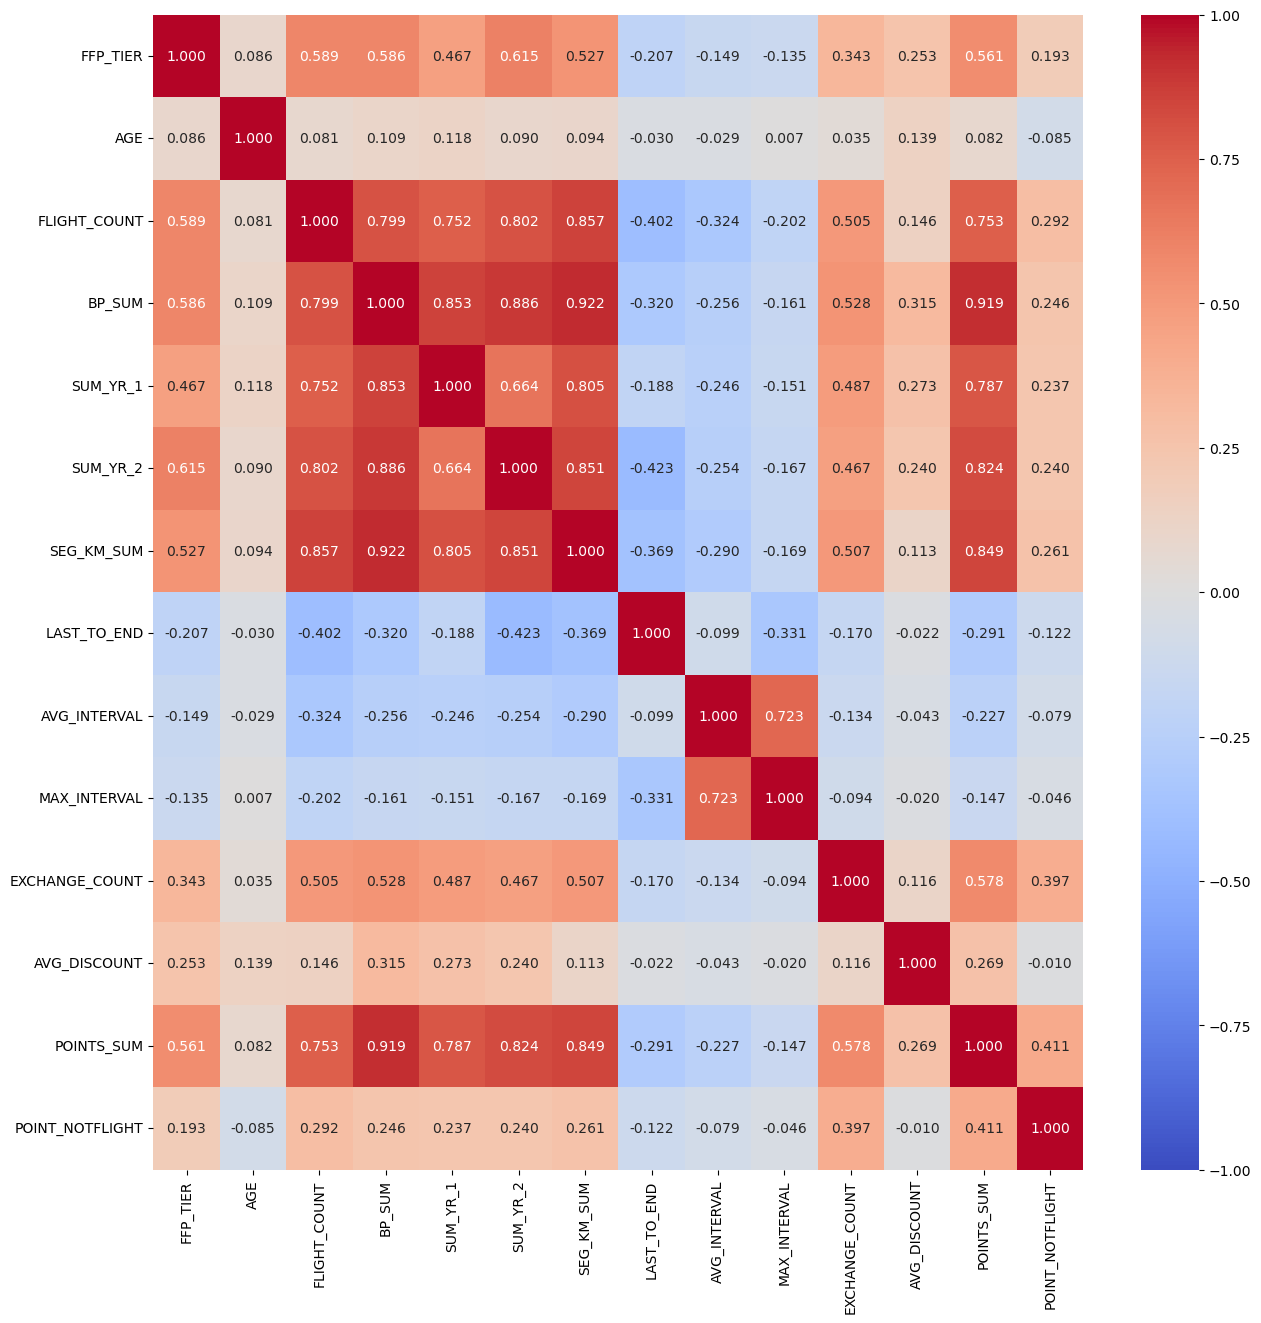

In [54]:
# Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In [56]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df.corr(method='spearman', numeric_only=True)

# Flatten correlation matrix.
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

flat_cm = flat_cm.loc[flat_cm['Corr Value'] < 1, :]
# flat_cm = flat_cm[(flat_cm['A'] != 'Clicked on Ad') & (flat_cm['B'] != 'Clicked on Ad')]

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundan_cm = flat_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True)
redundan_cm

A             B  Corr Value Corr Type
0         BP_SUM    POINTS_SUM    0.956547  Positive
1         BP_SUM    SEG_KM_SUM    0.933045  Positive
2   FLIGHT_COUNT    SEG_KM_SUM    0.901048  Positive
3     POINTS_SUM    SEG_KM_SUM    0.898685  Positive
4   FLIGHT_COUNT        BP_SUM    0.873605  Positive
..           ...           ...         ...       ...
86  MAX_INTERVAL      SUM_YR_1    0.016056  Negative
87  MAX_INTERVAL           AGE    0.014841  Positive
88    POINTS_SUM  MAX_INTERVAL    0.009255  Negative
89  MAX_INTERVAL        BP_SUM    0.007686  Negative
90  MAX_INTERVAL    SEG_KM_SUM    0.002814  Positive

[91 rows x 4 columns]

- Columns with strong correlation (equal to/above 0.3):
    - `FFP_TIER` with `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, `EXCHANGE_COUNT`, `POINTS_SUM`
    - `FLIGHT_COUNT` with BP_SUM, SUM_YR_1, SUM_YR_2, seg_km_sum, last_to_end, avg_interval, exchange_count, points_sum
    - bp_sum with sum_yr_1, sum_yr_2, seg_km_sum, last_to_end, exchange_count, avg_discount, poins_sum
    - sum_yr_1 with sum_yr_2, seg_km_sum, exchange_count, points_sum
    - sum_yr_2 with seg_km_sum, last_to_end, exchange_count, points_sum
    - seg_km_sum with last_to_end, exchange_count, points_sum
    - last_to_end with max_interval
    - avg_interval with max_interval
    - exchange_count with points_sum, point_notflight
    - points_sum with point_notflight
<br/><br/>
 - Columns with high multicollinearity (equal to/above 0.7):
    - flight_count with bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, points_sum
    - bp_sum with sum_yr_1, sum_yr_2, seg_km_sum, poins_sum    
    - sum_yr_1 with seg_km_sum, points_sum
    - sum_yr_2 with seg_km_sum, points_sum
    - avg_interval with max_interval

We can also see from the colour that the feature age and max_interval have low correlation score to almost all other features

# Feature Selection Thinking Process

LRFMC Model that is commonly used in aviation dataset. LRMFC stands for Length, Recency, Frequency, Monetary and Discount Factor. The details of each parameter is elaborated below:

- Length: the length of days between subscriber's first register day to observation time. A larger number means they have been a member for a longer time
- Recency: the length of a passenger's last consumption to observation window. A smaller number means they flew more recently
- Frequency: the passenger's consumption frequency within a certain period of time. A bigger number means they flew more frequently
- Monetary the average amount spent over a certain period of time. A bigger number means they spent more money
- Discount Factor: the average space discount factor for passengers traveling within a certain period of time A bigger number means they use discounts more

After looking at the data, we use columns below that related to the LRFMC features:

- Length: `LOAD_TIME` - `FFP_DATE`
- Recency: `LAST_TO_END`
- Frequency: `FLIGHT_COUNT`
- Monetary: `SEG_KM_FM`
- Customer Cost: `AVG_DISCOUNT`

But unfortunately since we remember at the beginning that the avg_discount feature have some problems we will just use LRFM analysis

In [42]:
#Feature engineering of loyalty

from datetime import timedelta

df['loyalty'] = df['load_time'] - df['ffp_date']

# Define a function to convert timedelta to months
def timedelta_to_months(td):
    total_days = td.total_seconds() / (60 * 60 * 24) #total second in an minute, total minute in an hour, and total hour in a day
    return total_days / 30.44 #average days in a month

# Apply the function to the 'loyalty' column
df['loyalty'] = df['loyalty'].apply(timedelta_to_months)
df.sample(10)

ffp_date first_flight_date gender  ffp_tier   work_city work_province  \
16893 2012-04-01        2012-04-01   Male         4     taiyuan        shanxi   
54120 2008-03-07        2010-04-10   Male         4      haikou        hainan   
31035 2012-07-07        2012-07-08   Male         4     tiantai      zhejiang   
45209 2010-02-22        2010-02-22   Male         4    wuhanshi    hubeisheng   
35364 2011-10-25        2011-10-25   Male         4    shenzhen     guangdong   
5413  2010-11-06        2011-04-20   Male         4  beijingshi       beijing   
46420 2005-11-23        2006-01-14   Male         4     beijing       beijing   
29211 2011-10-10        2011-12-19   Male         4  kunmingshi   yunnansheng   
35151 2006-09-27        2007-10-13   Male         4   guangzhou     guangdong   
39562 2012-09-05        2012-09-05   Male         4     beijing             .   

      work_country  age  load_time  flight_count  bp_sum  sum_yr_1  sum_yr_2  \
16893           CN   47 2014-03-31            17   13881      2139      5268   
54120           CN   56 2014-03-31             2    2467       621      1348   
31035           CN   35 2014-03-31             7    6100      1200         0   
45209           CN   47 2014-03-31             4    2386      2484       672   
35364           CN   46 2014-03-31             8    3567      3058      2276   
5413            CN   45 2014-03-31            24   30606     21960      8039   
46420           CN   47 2014-03-31             4    3290         0      2356   
29211           CN   59 2014-03-31             9    6529      2401      4357   
35151           CN   43 2014-03-31             6    6040      4133      1144   
39562           CN   42 2014-03-31             5    4476      1230      2142   

       seg_km_sum last_flight_date  last_to_end  avg_interval  max_interval  \
16893       17846       2014-01-26           66     41.562500           139   
54120        2680       2013-11-28          125    340.000000           340   
31035        8299       2013-06-19          287     57.666667           307   
45209        5109       2013-05-11          326     65.666667           133   
35364       10406       2014-02-26           35     98.000000           251   
5413        22266       2014-03-15           17     30.304348           157   
46420        3770       2014-03-12           20     73.666667           129   
29211       10722       2014-03-20           12     69.000000           188   
35151        9657       2014-02-05           56    128.600000           490   
39562        5305       2013-09-29          185     97.250000           377   

       exchange_count  avg_discount  points_sum  point_notflight     loyalty  
16893               0      0.805533       13881                0   23.948752  
54120               0      0.799250        2467                0   72.766097  
31035               0      0.859293        6100                0   20.762155  
45209               0      0.702182        2386                0   49.211564  
35364               0      0.558550        3567                0   29.172142  
5413                0      1.464651       31871                1   40.768725  
46420               0      0.893260        3290                0  100.197109  
29211               0      0.724515        6529                0   29.664915  
35151               1      0.607917        7540                2   90.078844  
39562               0      0.895762        4476                0   18.791064

In [43]:
#Select relevant features for analysis
selected_features = ['loyalty', 'last_to_end', 'flight_count', 'seg_km_sum']

df_selected = df[selected_features].copy()

In [44]:
# # Feature rename to LRFM
# df_selected.columns = ['L','R','F','M','C']

We could just change the columns name modified to LRFM but we will just keep the original name for better understanding and context.

# Handling Outliers


As explained before that the consideration in using the IQR (Interquartile Range) method to remove outliers is because the distribution of the data is skewed or not normal

**Additional Reminder (for me especially) About Outliers Handling**

Both IQR (Interquartile Range) and Z-Score methods are commonly used for handling outliers in a dataset. The choice between them depends on the nature of the data and the specific requirements of the analysis. Here are some considerations for when to use each method:

1. **IQR (Interquartile Range):**
   - **When the distribution is not normal or skewed:** IQR is robust to skewed distributions, making it suitable for datasets that do not follow a normal distribution.
   - **When there are suspected extreme values:** IQR is less sensitive to extreme values compared to Z-Score, making it suitable for datasets with potential outliers.

2. **Z-Score:**
   - **When the distribution is approximately normal:** Z-Score assumes a normal distribution, and it is more appropriate when dealing with data that is approximately normally distributed.
   - **For standardized comparisons:** Z-Score provides a standardized measure of how far each data point is from the mean, making it useful for comparing outliers across different datasets.

3. **Considerations for Both Methods:**
   - **Nature of the data:** Understand the characteristics of the data and the underlying distribution. If the data is strongly skewed, IQR might be more suitable. If it approximately follows a normal distribution, Z-Score could be considered.
   - **Analysis goals:** Consider the goals of your analysis. If your primary concern is identifying extreme values or handling skewed data, IQR may be preferable. If you need a standardized measure for comparisons, Z-Score might be more appropriate.

In many cases, it's beneficial to explore and compare the results of both methods to determine which one is more effective for a particular dataset and analysis goal. Additionally, visual exploration of the data using box plots or histograms can provide insights into the distribution and potential outliers, helping in the decision-making process.

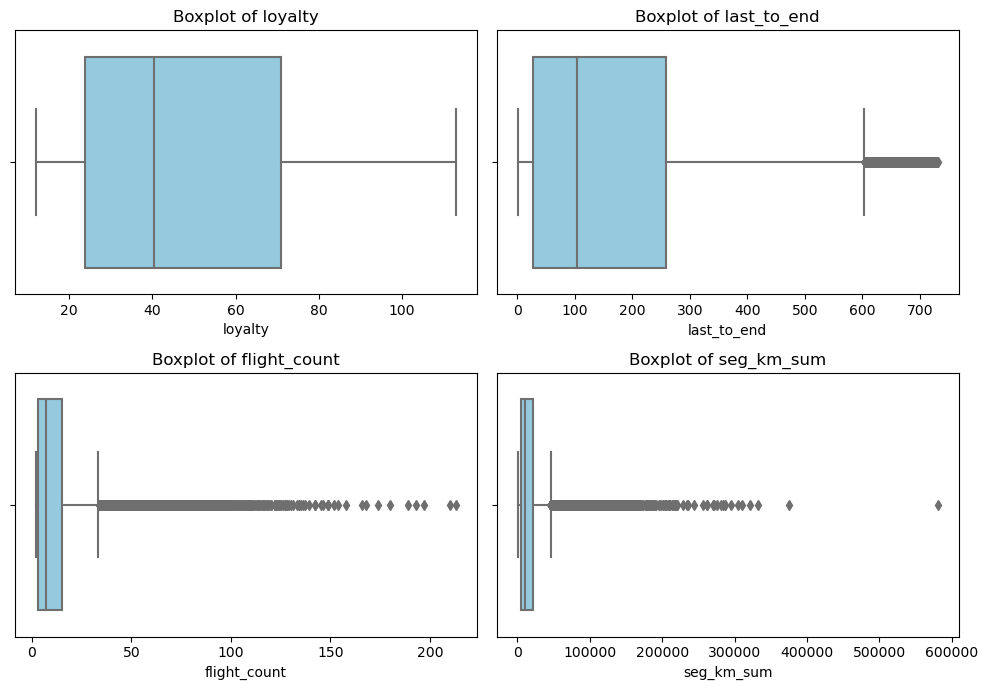

In [45]:
# Boxplot before handling outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
axes = axes.flatten()

for i in range(len(selected_features)) :
  sns.boxplot(data = df_selected, ax=axes[i], x=selected_features[i], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {selected_features[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(selected_features) < len(axes):
    axes[len(selected_features)].remove()

plt.tight_layout()

In [46]:
# Remove outliers with IQR method

print(f'The number of rows before filtering out outliers : {len(df_selected)}')

filtered_entries = np.array([True] * len(df_selected))

# Select features with outliers
for col in selected_features:

    Q1 = df_selected[col].quantile(0.25)
    Q3 = df_selected[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df_selected[col] >= lower_bound) & (df_selected[col] <= upper_bound)) & filtered_entries

df_filtered = df_selected[filtered_entries]

print(f'The number of rows after filtering out outliers: {len(df_filtered)}')

The number of rows before filtering out outliers : 58255
The number of rows after filtering out outliers: 50710


In [47]:
# # Remove outliers with z-score method

# from scipy import stats

# print(f'The number of rows before filtering out outliers : {len(df_selected)}')

# filtered_entries = np.array([True] * len(df_selected))

# Select features with outliers
# for col in selected_features:
#     zscore = abs(stats.zscore(df_selected[col])) # calculate the absolute z-score
#     filtered_entries = (zscore < 3) & filtered_entries # keep z-score values less than absolute 3
    
# df_filtered = df_selected[filtered_entries]

# print(f'The number of rows after filtering out outliers: {len(df_filtered)}')

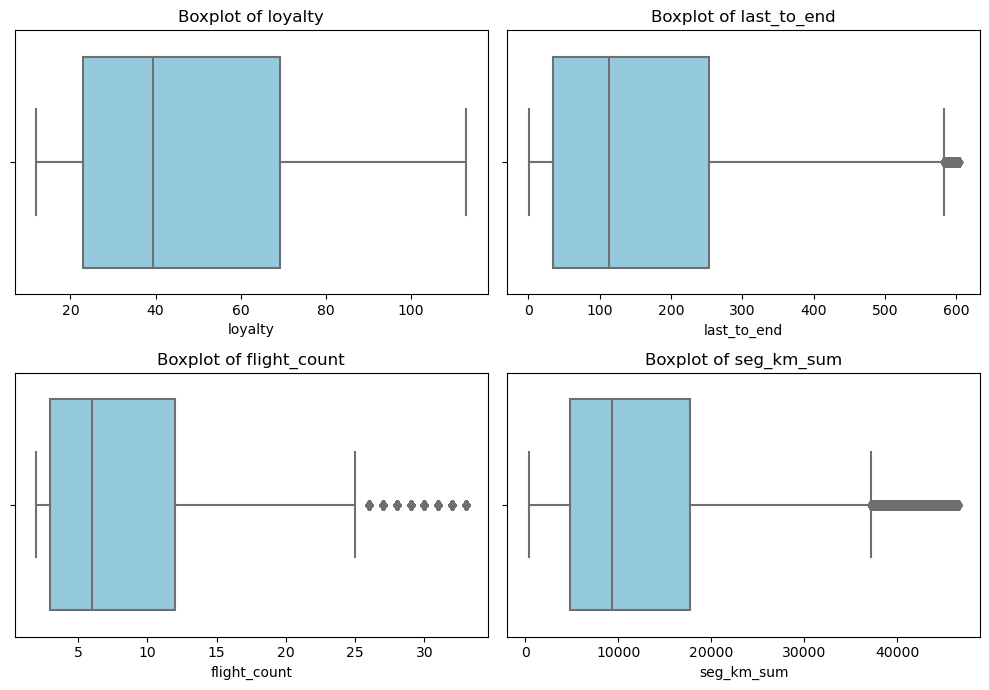

In [48]:
# Boxplot after handling outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
axes = axes.flatten()

for i in range(len(selected_features)) :
  sns.boxplot(data = df_filtered, ax=axes[i], x=selected_features[i], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {selected_features[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(selected_features) < len(axes):
    axes[len(selected_features)].remove()

plt.tight_layout()

# Feature Scaling

In [49]:
#Create copy of filtered dataframe before scaling process

df_before_scale = df_selected.copy()

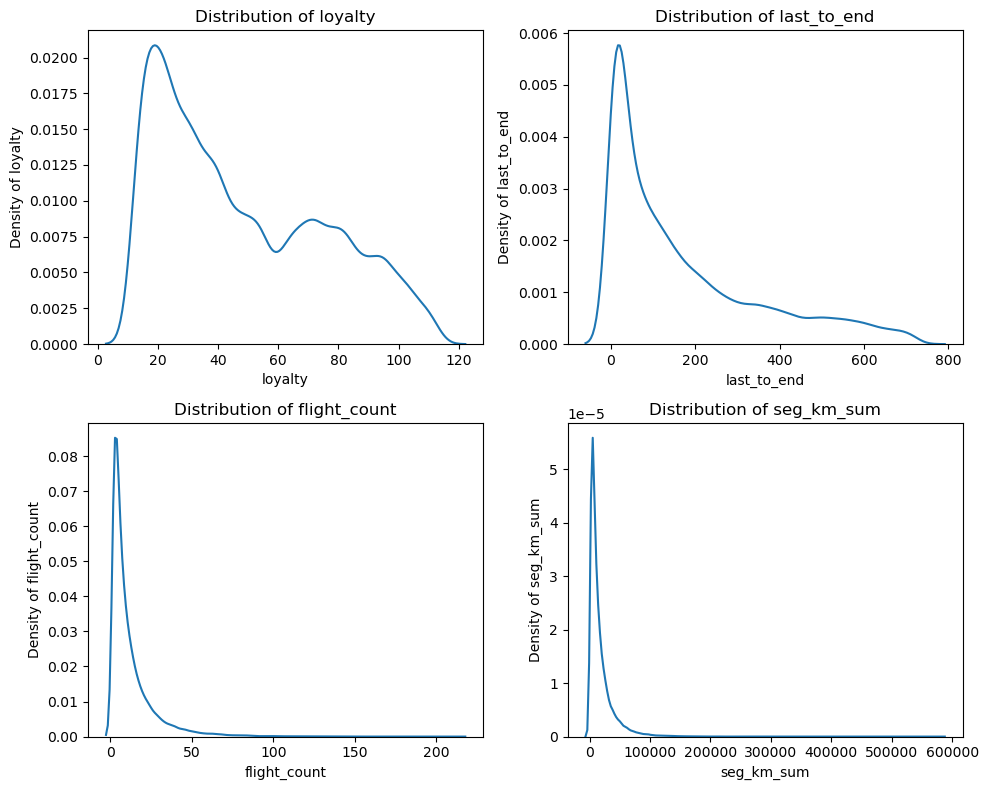

In [50]:
#Kdeplot before scaling

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes = axes.flatten()

for i in range(len(selected_features)) :
    sns.kdeplot(data=df_before_scale, ax=axes[i], x=selected_features[i])
    axes[i].set_title(f'Distribution of {selected_features[i]}')
    axes[i].set_ylabel(f'Density of {selected_features[i]}')
    axes[i].set_xlabel(f'{selected_features[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(selected_features) < len(axes):
    axes[len(selected_features)].remove()

plt.tight_layout()

In [51]:
# # Log transformation
# df_before_scale[selected_features] = np.log1p(df_before_scale[selected_features])

In [52]:
# Standardization
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_std_values = ss.fit_transform(df_before_scale[selected_features])

In [53]:
#Check the values of scalled features
df_std_values

array([[ 1.48140186, -0.94293674, 13.90330889, 26.86561168],
       [ 1.37309737, -0.88755305,  8.63510447, 12.70208506],
       [ 0.69708688, -0.4112533 ,  0.76791921, 12.58877875],
       ...,
       [ 0.02702719, -0.45556026, -0.56669258, -0.4452614 ],
       [ 1.73966643, -0.7878624 , -0.70717803, -0.70382486],
       [-1.24168263,  1.26687253, -0.70717803, -0.63992315]])

In [54]:
# Initialize new dataframe
df_std = pd.DataFrame(df_std_values, columns=selected_features)
df_std.sample(5)

loyalty  last_to_end  flight_count  seg_km_sum
46235 -1.133378     0.214582     -0.566693   -0.633724
13896  0.173417    -0.743555     -0.707178    0.442925
19821  0.579261     0.247813      0.065492    0.050549
5819   0.141282    -0.882015      0.486948    1.266970
4446  -0.199103    -0.904168      1.189376    0.842835

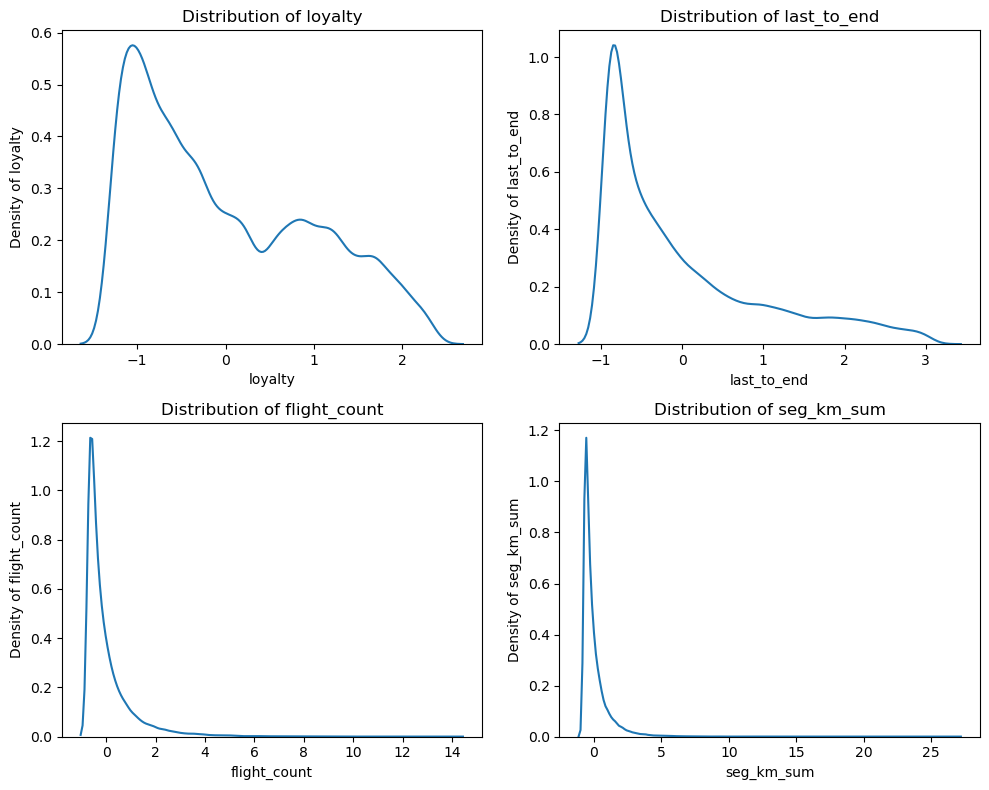

In [55]:
#Kdeplot after scaling
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes = axes.flatten()

for i in range(len(selected_features)) :
    sns.kdeplot(data=df_std, ax=axes[i], x=selected_features[i])
    axes[i].set_title(f'Distribution of {selected_features[i]}')
    axes[i].set_ylabel(f'Density of {selected_features[i]}')
    axes[i].set_xlabel(f'{selected_features[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(selected_features) < len(axes):
    axes[len(selected_features)].remove()
    
plt.tight_layout()

In [56]:
# Create copy dataframe before moving to modelling process
df_model = df_std.copy()

# Clustering : K-means

## Finding Optimal Cluster Using Elbow Method and Silhouette Score

<Axes: >

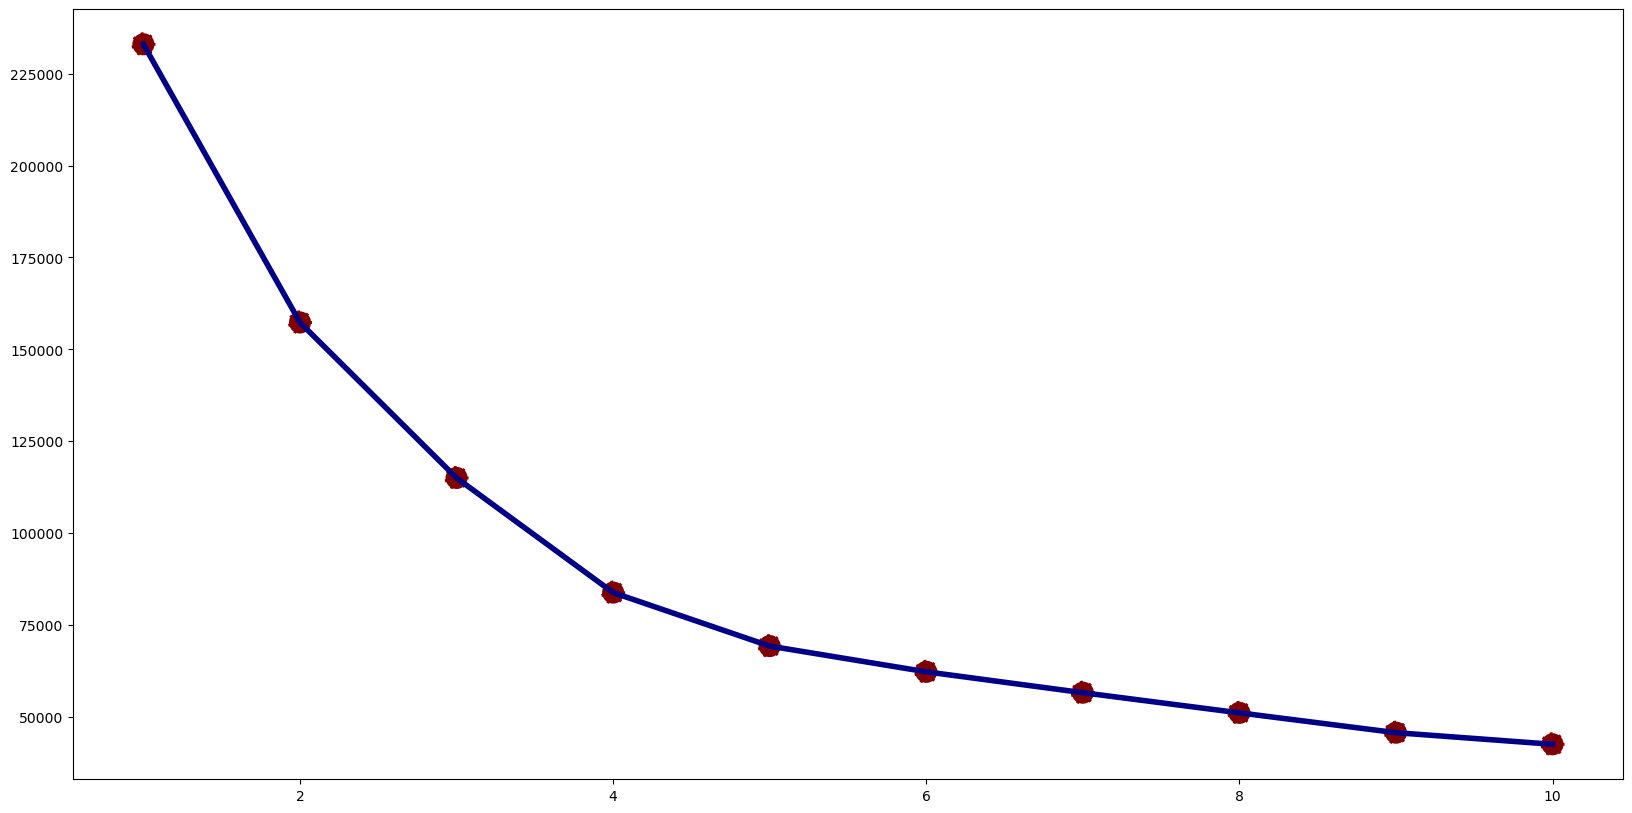

In [57]:
# Elbow method
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=4)
    kmeans.fit(df_model)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [58]:
#List of inertias
inertia

[233019.9999999996,
 157299.81076358288,
 114982.3328190984,
 83778.50222124853,
 69217.23957125848,
 62213.89788799048,
 56529.923785606494,
 51043.23915365398,
 45644.68675948269,
 42488.363363261255]

In [59]:
# Inertia reduction by cluster in percentage
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    32.495146
1    26.902434
2    27.137935
3    17.380667
4    10.117915
5     9.136181
6     9.705806
7    10.576430
8     6.914985
9          NaN
dtype: float64

We can see that from elbow method (internal evaluation), the number of optimal cluster is N = 5, because that's where the decrease of inertia is small for the next clusters

In [60]:
# Silhouette score
from sklearn.metrics import silhouette_score

arr_silhouette_score_euclidean = []
# arr_silhouette_score_mahalanobis = []

for i in list(range(2,11)):
    kmeans = KMeans(n_clusters=i).fit(df_model)
    preds = kmeans.predict(df_model)
    
    #Using euclidean (faster)
    score_euclidean = silhouette_score(df_model, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

    # #Using mahalanobis
    # score_mahalanobis = silhouette_score(df_std, preds, metric='mahalanobis')
    # arr_silhouette_score_mahalanobis.append(score_mahalanobis)

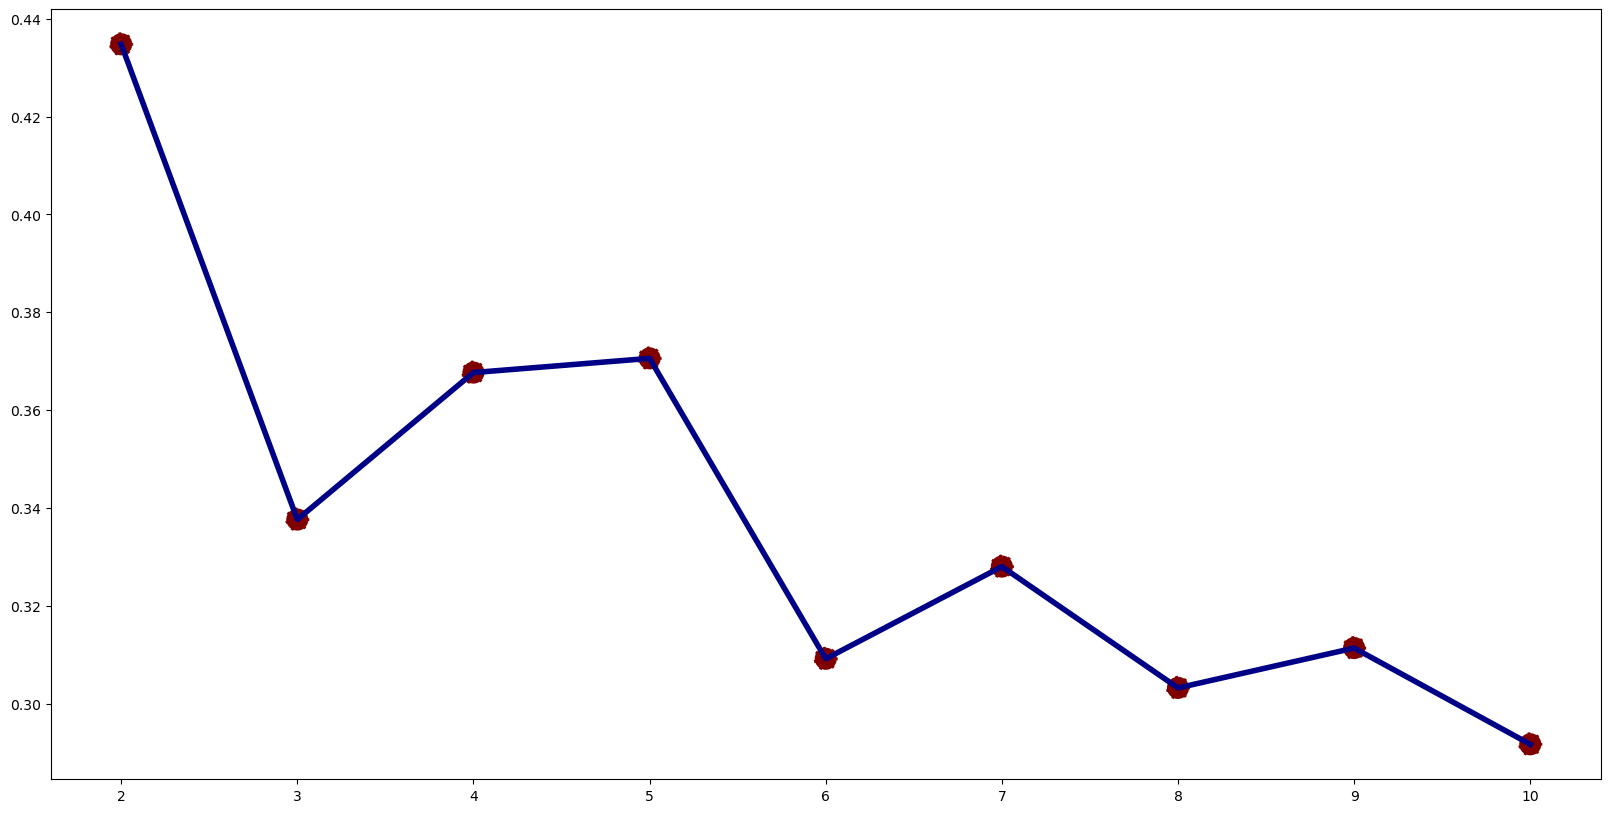

In [61]:
#Visualize silhouette score
fig, ax = plt.subplots(figsize=(20, 10))

#Using euclidean (faster)
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

# #Using mahalanobis
# sns.lineplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, color='#000087', linewidth = 4)
# sns.scatterplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, s=300, color='#800000',  linestyle='--')

plt.show()

In [62]:
# Silhouette score reduction by cluster in percentage
(pd.Series(arr_silhouette_score_euclidean) - pd.Series(arr_silhouette_score_euclidean).shift(-1)) / pd.Series(arr_silhouette_score_euclidean) * 100

0    22.345432
1    -8.898783
2    -0.788413
3    16.571389
4    -6.095561
5     7.560336
6    -2.686822
7     6.317574
8          NaN
dtype: float64

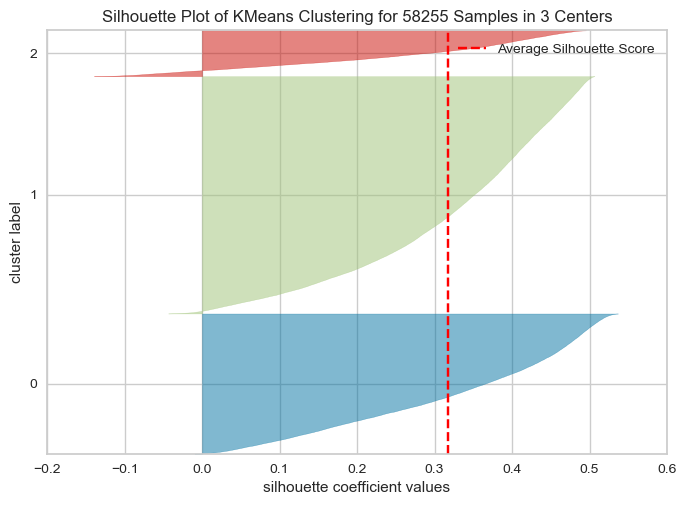

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 58255 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
#Silhouetter plot (3 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_model)        # Fit the data to the visualizer
visualizer.show()                    # Finalize and render the figure

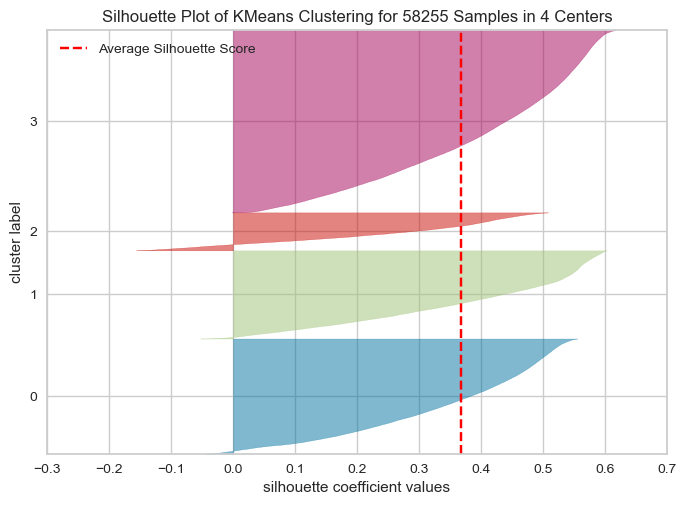

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 58255 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [64]:
#Silhouetter plot (4 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_model)        # Fit the data to the visualizer
visualizer.show()                    # Finalize and render the figure

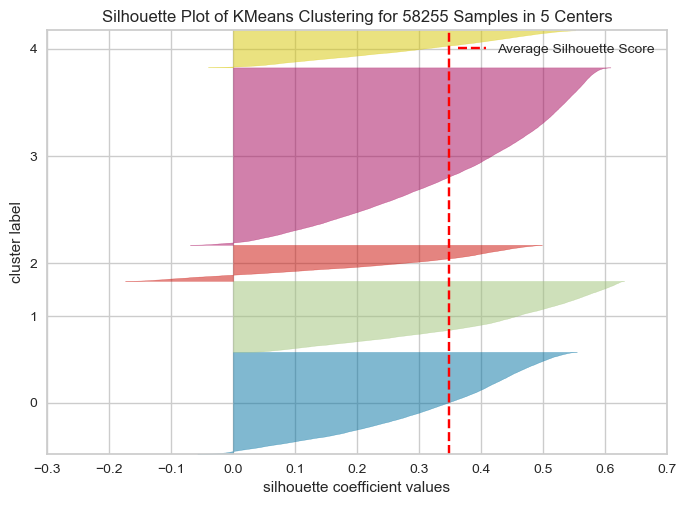

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 58255 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
#Silhouetter plot (5 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_model)        # Fit the data to the visualizer
visualizer.show()                    # Finalize and render the figure

Reference for yellowbrick : https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

## Clustering Process Using K-means

In [66]:
#Fit cluster into our scaled dataframe
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_model)

In [67]:
#Assign the cluster to our original dataframe and scaled dataframe
df_model['clusters'] = kmeans.labels_
df['clusters'] = kmeans.labels_

In [68]:
#See original dataframe by selected features with its assigned cluster
df[df_model.columns].head(5)

loyalty  last_to_end  flight_count  seg_km_sum  clusters
0  88.896189            1           210      580717         3
2  85.906702           11           135      283712         3
3  67.247043           97            23      281336         3
4  59.658344            5           152      309928         3
5  73.620237           79            92      294585         3

In [69]:
#See scaled dataframe with its assigned cluster
df_model.head(5)

loyalty  last_to_end  flight_count  seg_km_sum  clusters
0  1.481402    -0.942937     13.903309   26.865612         3
1  1.373097    -0.887553      8.635104   12.702085         3
2  0.697087    -0.411253      0.767919   12.588779         3
3  0.422160    -0.920783      9.829231   13.952269         3
4  0.927978    -0.510944      5.614667   13.220595         3

# PCA and Visualization

Since there are 5 features being used, PCA should be employed for 2D visualization to make it easier to observe.

In [70]:
#PCA method to reduce features to 2
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_model)
pcs = pca.transform(df_model)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df_model['clusters']
data_pca.head(5)

PC 1       PC 2  clusters
0  13.590363  24.009215         3
1   7.859217  12.287907         3
2   5.017084   7.517963         3
3   8.242258  13.879941         3
4   6.776511  10.800319         3

<Axes: xlabel='PC 1', ylabel='PC 2'>

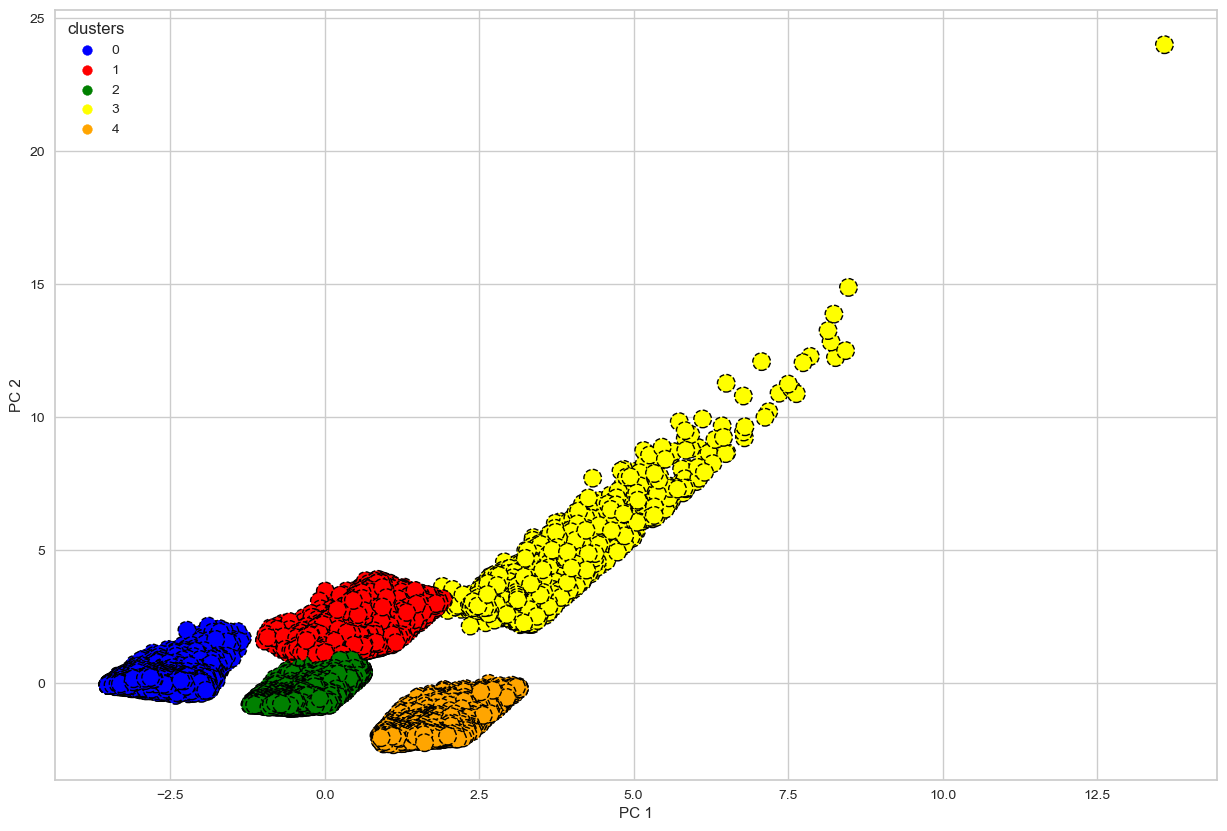

In [71]:
#Visualize cluster
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','yellow', 'orange'],
    s=160,
    ax=ax
)

**!Note : That one extreme data point make the other clusters look so small and close to each other, it probably have something to do with the outliers handling but i already handle them with IQR filtering and scale the features with standardization so I'm not sure what the root cause is; kinda curious about this problem though will probably look it up later in the future.**

# Cluster Interpretation and Business Recommendation

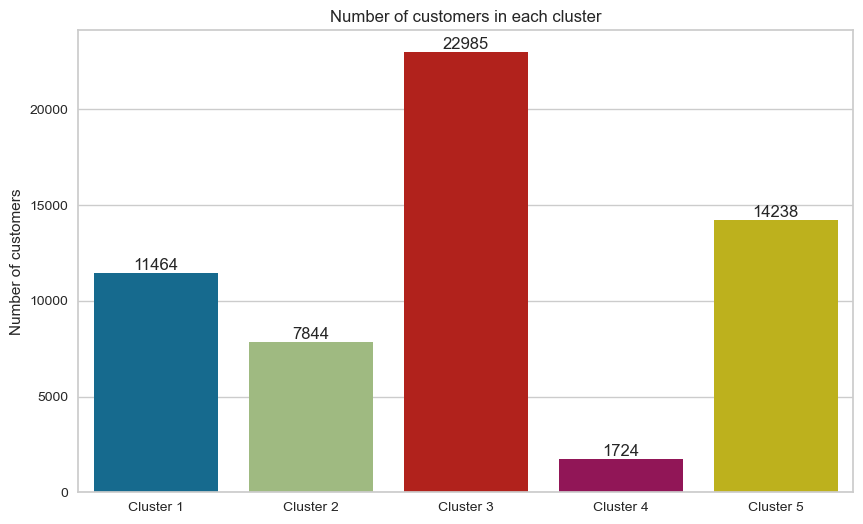

In [72]:
#Check count of each clusters

plt.figure(figsize=(10,6))
ax = sns.countplot(x=df_model['clusters'])
ax.bar_label(ax.containers[0])  #to display count
plt.xticks([0,1,2,3,4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.title("Number of customers in each cluster")
plt.xlabel("")
plt.ylabel("Number of customers")
plt.show()

In [74]:
#See original dataframe grouped with cluster aggregated by mean and median

display(df[df_model.columns].groupby('clusters').agg(['mean']))

loyalty last_to_end flight_count    seg_km_sum
               mean        mean         mean          mean
clusters                                                  
0         38.360581  479.810537     3.887474   5997.533583
1         55.756792   41.663947    29.836945  42733.772310
2         28.492884  105.689276     8.090189  11470.855297
3         68.378648   18.037123    66.770882  97266.556845
4         80.534610  118.608934     8.661820  12332.805169

## Contextual description of what kind of customers exist in each cluster

- **Cluster 0**: Customers that recently became a member, have highest time difference between their last flight and last order, a lowest average number of flights, and the lowest total distance flown
- **Cluster 1**: Customers that became a member for quite some time, have low time difference between their last flight and last order, a really high average number of flights, and high total distance flown
- **Cluster 2**: Customers that recently became a member, have medium time difference between their last flight and last order, a low average number of flights, and a medium total distance flown
- **Cluster 3**: Customers that became a member for quite some time, have the lowest time difference between their last flight and last order, the highest average number of flights, and highest total distance flown
- **Cluster 4**: Customers that became a member the longest, have the medium time difference between their last flight and last order, a low average number of flights, a medium total distance flown

## Business Recommendation For Each Cluster

In general, the following two recommendations can be made:
1. Create specific campaigns for each customer segment, as each segment exhibits different behavioral patterns.
2. Follow up on the reactions from each segment regarding the campaigns/treatments conducted to continuously improve the services for each segment.

Specific recommendations for each cluster are as follows:

**Cluster 0: New Explorers**
- *Recommendation:* Since these customers recently became members and have the highest time difference between their last flight and last order, consider implementing targeted marketing campaigns to encourage them to book more flights. Offer promotions or discounts to incentivize their next booking.

**Cluster 1: Elite Travelers**
- *Recommendation:* Focus on customer loyalty programs and exclusive benefits for this cluster, as they have been members for a significant amount of time and show a high level of engagement. Offer personalized rewards, premium services, or early access to promotions to maintain their loyalty.

**Cluster 2: Engagement Seekers**
- *Recommendation:* Target this cluster with campaigns to increase their engagement, as they recently became members and have a medium time difference between their last flight and last order. Provide them with personalized offers to encourage more frequent bookings and build a stronger connection with the airline.

**Cluster 3: Seasoned Jetsetters**
- *Recommendation:* Since these customers have been members for quite some time, have a low time difference between their last flight and last order, and exhibit a high level of engagement, focus on providing them with premium services and personalized experiences. Offer exclusive deals, upgrades, or priority services to enhance their loyalty.

**Cluster 4: Rediscovery Nomads**
- *Recommendation:* Given that these customers have been members for the longest time and have a medium time difference between their last flight and last order, consider launching campaigns to re-engage them. Provide special offers, introduce new services, or showcase the latest features to reignite their interest in the airline.